# Análise e Tratamento de Dados para o Relatório

Após processo de tratamento de dados envolvendo os quatro dataframes: `contract.csv`, `personal.csv`, `internet.csv` e `phone.csv`, foram realizadas diversas etapas para garantir a qualidade e a integridade dos dados. Este tratamento incluiu a análise e o tratamento de dados faltantes e duplicados, a padronização dos cabeçalhos e o ajuste dos tipos de dados de acordo com as necessidades específicas da análise.

Em seguida, foi realizada uma análise exploratória de dados (EDA) completa, permitindo uma compreensão mais profunda das características dos dados e suas inter-relações. Essa etapa foi fundamental para identificar padrões e tendências que podem influenciar as decisões posteriores.

Após a EDA, todos os dataframes foram unidos através da operação de `merge`, o que possibilitou a criação de novas variáveis através do processo de feature engineering. Durante essa fase, foram analisadas estatísticas descritivas e correlações entre as variáveis, proporcionando um panorama mais abrangente das relações presentes no conjunto de dados.

Para lidar com colunas categóricas, aplicamos a técnica de OneHotEncoder, que transforma essas colunas em um formato adequado para modelagem, permitindo que os algoritmos de aprendizado de máquina possam utilizá-las de forma eficaz.

O resultado desse processo foi a criação de um novo dataframe, denominado `merged_data_encoded.csv`, que reunirá todas as informações tratadas e preparadas. Este novo conjunto de dados será a base para o relatório, modelagens e para as análises subsequentes.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from collections import Counter
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


C:\Users\rafa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('merged_data_encoded.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         7032 non-null   float64
 1   total_charges                           7032 non-null   float64
 2   senior_citizen                          7032 non-null   int64  
 3   contract_duration                       7032 non-null   int64  
 4   total_months                            7032 non-null   int64  
 5   average_monthly_charge                  7032 non-null   float64
 6   services_count                          7032 non-null   int64  
 7   type_numeric                            7032 non-null   int64  
 8   gender_numeric                          7032 non-null   int64  
 9   partner_numeric                         7032 non-null   int64  
 10  dependents_numeric                      7032 non-null   int6

# Análise de Modelos Otimizados


Nesta análise, foram utilizados alguns algoritmos de aprendizado supervisionado para prever a variável alvo (churn). Para otimizar os hiperparâmetros de cada modelo, aplicamos o `GridSearchCV`, que nos permitiu testar diferentes combinações de parâmetros e selecionar as melhores configurações com base nas métricas de desempenho.

Os modelos analisados inicialmente foram:

- Regressão Logística
- Decision Tree
- Random Forest
- Gradient Boosting

As principais métricas de avaliação incluem a AUC (Área Sob a Curva ROC), Precisão, Recall, F1-Score e Acurácia. A tabela abaixo apresenta os resultados para cada modelo, calculados sobre o conjunto de teste:

| Modelo             | AUC    | Precisão | Recall  | F1-Score | Acurácia |
|--------------------|--------|----------|---------|----------|----------|
| Regressão Logística| 0.8249 | 0.5497   | 0.6861  | 0.6104   | 0.7725   |
| Decision Tree      | 0.7843 | 0.5578   | 0.6168  | 0.5858   | 0.7735   |
| Random Forest      | 0.8282 | 0.5977   | 0.5693  | 0.5832   | 0.7886   |
| Gradient Boosting  | 0.8441 | 0.5108   | 0.7737  | 0.6154   | 0.7488   |

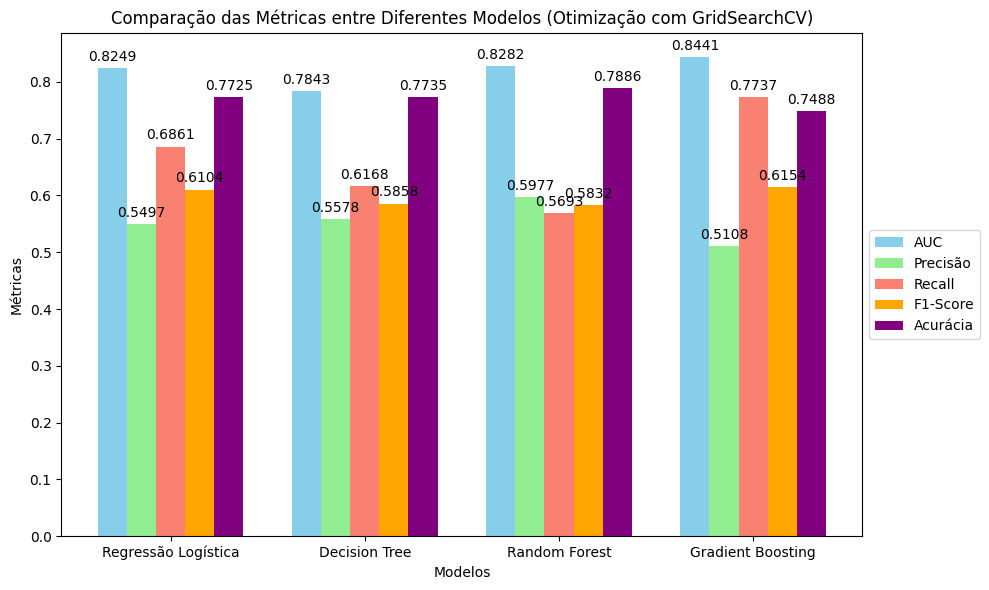

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas para os diferentes modelos
modelos = ['Regressão Logística', 'Decision Tree',
           'Random Forest', 'Gradient Boosting']
auc = [0.8249, 0.7843, 0.8282, 0.8441]
precisao = [0.5497, 0.5578, 0.5977, 0.5108]
recall = [0.6861, 0.6168, 0.5693, 0.7737]
f1_scores = [0.6104, 0.5858, 0.5832, 0.6154]
acuracia = [0.7725, 0.7735, 0.7886, 0.7488]

# Configuração do gráfico
x = np.arange(len(modelos))  # Posições no eixo x
largura = 0.15  # Largura das barras

# Criação da figura e dos subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Adicionando as barras para cada métrica
bar1 = ax.bar(x - 2*largura, auc, largura, label='AUC', color='skyblue')
bar2 = ax.bar(x - largura, precisao, largura,
              label='Precisão', color='lightgreen')
bar3 = ax.bar(x, recall, largura, label='Recall', color='salmon')
bar4 = ax.bar(x + largura, f1_scores, largura, label='F1-Score', color='orange')
bar5 = ax.bar(x + 2*largura, acuracia, largura,
              label='Acurácia', color='purple')

# Função para adicionar os valores sobre as barras


def adicionar_valores(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.4f}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Adicionando os valores sobre cada conjunto de barras
adicionar_valores(bar1)
adicionar_valores(bar2)
adicionar_valores(bar3)
adicionar_valores(bar4)
adicionar_valores(bar5)

# Configurações do gráfico
ax.set_xlabel('Modelos')
ax.set_ylabel('Métricas')
ax.set_title(
    'Comparação das Métricas entre Diferentes Modelos (Otimização com GridSearchCV)')
ax.set_xticks(x)
ax.set_xticklabels(modelos)

# Ajustando a posição da legenda para fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Após a análise dos resultados, foram selecionados os dois melhores modelos para novas otimizações, que são:

- **Gradient Boosting**, que obteve o melhor valor de AUC (0.8441), indicando um excelente desempenho no equilíbrio entre falso positivo e verdadeiro positivo.
- **Random Forest**, que apresentou uma boa acurácia (0.7886) e um desempenho geral sólido com um AUC de 0.8282.

Os outros dois modelos, Regressão Logística e Decision Tree, apesar de apresentarem desempenho razoável, tiveram uma performance inferior em comparação com os dois primeiros e, por isso, foram descartados para novas otimizações.



# Otimização com a biblioteca Optuna

As próximas etapas se concentrarão na otimização dos modelos de Gradient Boosting e Random Forest, visando explorar ainda mais seu potencial de melhoria e identificar a abordagem mais eficaz para resolver o problema. Nesta nova fase, utilizaremos a biblioteca Optuna, que facilita a otimização de hiperparâmetros. O principal diferencial do Optuna é a sua abordagem eficiente de busca, que permite definir um espaço de busca para os parâmetros a serem otimizados, especificando os domínios e as restrições de cada parâmetro. Além disso, devemos implementar uma função objetivo que retornará a métrica a ser maximizada ou minimizada, orientando assim o processo de otimização.

Neste contexto, também incluímos modelos mais modernos, como XGBoost, LightGBM e CatBoost, a fim de otimizar ainda mais o desempenho do modelo de detecção de churn. A avaliação do modelo será realizada utilizando técnicas de validação cruzada, garantindo uma análise mais robusta e confiável do desempenho em diferentes subconjuntos de dados. Essa metodologia não apenas nos permitirá encontrar combinações ideais de hiperparâmetros, mas também assegurará que a busca seja feita de maneira eficaz e dentro de um tempo razoável, contribuindo para o desenvolvimento de modelos mais robustos e precisos.

In [4]:
# Separar as features (X) e o target (y)
X = df.drop(columns=['churn'])  # Remover a coluna 'churn' das features
y = df['churn']  # O target é a coluna 'churn'

# Dividir os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verificar o tamanho dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treino: 4219
Tamanho do conjunto de validação: 1406
Tamanho do conjunto de teste: 1407


In [5]:
def objective(trial):
    # Escolher se os dados serão balanceados ou não
    balance_data = trial.suggest_categorical('balance_data', [True, False])

    # Balancear os dados de treino com SMOTE se balance_data for True
    if balance_data:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(
            X_train, y_train)
        print(
            f"Distribuição após o balanceamento: {Counter(y_train_resampled)}")
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
        print(f"Distribuição original: {Counter(y_train_resampled)}")

    # Remover espaços em branco nos nomes das características
    X_train_resampled.columns = X_train_resampled.columns.str.replace(' ', '_')
    X_val.columns = X_val.columns.str.replace(' ', '_')
    X_test.columns = X_test.columns.str.replace(' ', '_')

    # Escolher o tipo de modelo
    model_type = trial.suggest_categorical('model_type', [
                                           'RandomForest', 'GradientBoosting', 'XGBoost', 'LightGBM', 'CatBoost'])

    if model_type == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 1, 32, log=True)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        max_features = trial.suggest_categorical(
            'max_features', ['sqrt', 'log2', None])

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=42
        )

    elif model_type == 'GradientBoosting':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 32, log=True)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)

        model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            subsample=subsample,
            random_state=42
        )

    elif model_type == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 32, log=True)

        model = XGBClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            random_state=42
        )

    elif model_type == 'LightGBM':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 32, log=True)

        model = LGBMClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            random_state=42,
            verbose=-1
        )

    elif model_type == 'CatBoost':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        depth = trial.suggest_int('depth', 1, 10)

        model = CatBoostClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            depth=depth,
            verbose=0,
            random_state=42
        )

    # Configurar KFold para validação cruzada
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Avaliar o modelo usando validação cruzada
    auc_scores = cross_val_score(
        model, X_train_resampled, y_train_resampled, cv=kf, scoring='roc_auc'
    )

    # Retornar a média das pontuações AUC para ser maximizada
    return np.mean(auc_scores)

In [6]:
# Criar o estudo de otimização
study = optuna.create_study(direction='maximize')  # Maximizar o AUC
study.optimize(objective, n_trials=1000)  # Realizar 200 experimentos

# Melhor conjunto de hiperparâmetros
best_params = study.best_params
print("Melhores Hiperparâmetros:", best_params)

# Verificar se os dados balanceados são os melhores
if best_params['balance_data']:
    # Re-balancear os dados com os melhores parâmetros se necessário
    smote = SMOTE(random_state=42)
    X_train_best, y_train_best = smote.fit_resample(X_train, y_train)
else:
    X_train_best, y_train_best = X_train, y_train

# Treinar o modelo com os melhores hiperparâmetros
if best_params['model_type'] == 'RandomForest':
    model_best = RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        max_features=best_params['max_features'],
        random_state=42
    )
elif best_params['model_type'] == 'GradientBoosting':
    model_best = GradientBoostingClassifier(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        subsample=best_params['subsample'],
        random_state=42
    )
elif best_params['model_type'] == 'XGBoost':
    model_best = XGBClassifier(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        random_state=42
    )
elif best_params['model_type'] == 'LightGBM':
    model_best = LGBMClassifier(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        random_state=42
    )
elif best_params['model_type'] == 'CatBoost':
    model_best = CatBoostClassifier(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        depth=best_params['depth'],
        verbose=0,
        random_state=42
    )

model_best.fit(X_train_best, y_train_best)

[I 2024-10-24 01:30:02,682] A new study created in memory with name: no-name-fd4fa6cc-3bd8-46aa-a87c-bf1177218bf2


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:30:13,075] Trial 0 finished with value: 0.9138407109754688 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 298, 'learning_rate': 0.04952701343266224, 'depth': 1}. Best is trial 0 with value: 0.9138407109754688.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:31:20,384] Trial 1 finished with value: 0.938425396341876 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 228, 'learning_rate': 0.012347647841476336, 'max_depth': 25}. Best is trial 1 with value: 0.938425396341876.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:31:39,192] Trial 2 finished with value: 0.9007923837347118 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 577, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.938425396341876.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 01:32:10,886] Trial 3 finished with value: 0.8530854973102706 and parameters: {'balance_data': False, 'model_type': 'RandomForest', 'n_estimators': 302, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 1 with value: 0.938425396341876.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:32:13,005] Trial 4 finished with value: 0.9220007984233991 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 549, 'learning_rate': 0.03768974276674014, 'max_depth': 1}. Best is trial 1 with value: 0.938425396341876.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:32:50,052] Trial 5 finished with value: 0.9491687959976627 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 487, 'learning_rate': 0.29042093676986624, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 4, 'subsample': 0.9700580892963229}. Best is trial 5 with value: 0.9491687959976627.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:32:52,427] Trial 6 finished with value: 0.9487338058603798 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 209, 'learning_rate': 0.24080763009411427, 'max_depth': 2}. Best is trial 5 with value: 0.9491687959976627.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 01:32:58,065] Trial 7 finished with value: 0.8533226806392827 and parameters: {'balance_data': False, 'model_type': 'LightGBM', 'n_estimators': 614, 'learning_rate': 0.0131228823489019, 'max_depth': 3}. Best is trial 5 with value: 0.9491687959976627.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 01:33:40,223] Trial 8 finished with value: 0.8528175740992537 and parameters: {'balance_data': False, 'model_type': 'RandomForest', 'n_estimators': 368, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 5 with value: 0.9491687959976627.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:33:55,670] Trial 9 finished with value: 0.9418080653595293 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 215, 'learning_rate': 0.027087787774561528, 'depth': 5}. Best is trial 5 with value: 0.9491687959976627.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 01:34:21,497] Trial 10 finished with value: 0.8643659496456291 and parameters: {'balance_data': False, 'model_type': 'GradientBoosting', 'n_estimators': 990, 'learning_rate': 0.2874869358236453, 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 1, 'subsample': 0.9969725605888415}. Best is trial 5 with value: 0.9491687959976627.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:35:15,186] Trial 11 finished with value: 0.9489522174133238 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 789, 'learning_rate': 0.28931222640484555, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 6, 'subsample': 0.8864328887643467}. Best is trial 5 with value: 0.9491687959976627.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:36:10,131] Trial 12 finished with value: 0.9504126788465838 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 806, 'learning_rate': 0.21045612521728668, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 6, 'subsample': 0.935300133783871}. Best is trial 12 with value: 0.9504126788465838.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:38:07,706] Trial 13 finished with value: 0.9463458092920133 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 755, 'learning_rate': 0.1735157887023703, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 4, 'subsample': 0.5860510220417834}. Best is trial 12 with value: 0.9504126788465838.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:38:39,595] Trial 14 finished with value: 0.9488157117194962 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 453, 'learning_rate': 0.2024411091293408, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 8, 'subsample': 0.8807061766632047}. Best is trial 12 with value: 0.9504126788465838.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:39:17,051] Trial 15 finished with value: 0.9405364967151499 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 923, 'learning_rate': 0.11427244874677543, 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 4, 'subsample': 0.9955885149291965}. Best is trial 12 with value: 0.9504126788465838.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:41:22,969] Trial 16 finished with value: 0.9465078975445017 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 728, 'learning_rate': 0.2384577841258473, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 7, 'subsample': 0.8104652222530965}. Best is trial 12 with value: 0.9504126788465838.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:42:19,999] Trial 17 finished with value: 0.9501310431583955 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 870, 'learning_rate': 0.12068844193751602, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 2, 'subsample': 0.6342363320897988}. Best is trial 12 with value: 0.9504126788465838.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 01:43:04,144] Trial 18 finished with value: 0.8529565759550932 and parameters: {'balance_data': False, 'model_type': 'GradientBoosting', 'n_estimators': 847, 'learning_rate': 0.11182998470921436, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 1, 'subsample': 0.6589975859246634}. Best is trial 12 with value: 0.9504126788465838.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:43:16,052] Trial 19 finished with value: 0.9497762090826598 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 665, 'learning_rate': 0.12391380948494003, 'max_depth': 11}. Best is trial 12 with value: 0.9504126788465838.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:54:32,965] Trial 20 finished with value: 0.9488473932212805 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 888, 'learning_rate': 0.07575915402102842, 'depth': 10}. Best is trial 12 with value: 0.9504126788465838.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:54:44,857] Trial 21 finished with value: 0.9499827633116877 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 638, 'learning_rate': 0.13178104304562813, 'max_depth': 12}. Best is trial 12 with value: 0.9504126788465838.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:54:56,455] Trial 22 finished with value: 0.9505617057288264 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 680, 'learning_rate': 0.14644127810378305, 'max_depth': 28}. Best is trial 22 with value: 0.9505617057288264.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:55:00,381] Trial 23 finished with value: 0.9519708615697848 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 820, 'learning_rate': 0.16896894628003192, 'max_depth': 3}. Best is trial 23 with value: 0.9519708615697848.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:55:13,149] Trial 24 finished with value: 0.9495805587300268 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 724, 'learning_rate': 0.18669314656449293, 'max_depth': 20}. Best is trial 23 with value: 0.9519708615697848.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:55:24,252] Trial 25 finished with value: 0.9492159907942629 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 821, 'learning_rate': 0.21275832963098337, 'max_depth': 6}. Best is trial 23 with value: 0.9519708615697848.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 01:55:24,839] Trial 26 finished with value: 0.8574434909316627 and parameters: {'balance_data': False, 'model_type': 'LightGBM', 'n_estimators': 101, 'learning_rate': 0.15922274194777694, 'max_depth': 3}. Best is trial 23 with value: 0.9519708615697848.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:55:35,253] Trial 27 finished with value: 0.9495182841282446 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 977, 'learning_rate': 0.15232135521412066, 'max_depth': 5}. Best is trial 23 with value: 0.9519708615697848.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 01:56:05,394] Trial 28 finished with value: 0.9499438944785208 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 674, 'learning_rate': 0.2366708603394514, 'max_depth': 32}. Best is trial 23 with value: 0.9519708615697848.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:06:02,388] Trial 29 finished with value: 0.94802356964335 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 781, 'learning_rate': 0.08784480443797761, 'depth': 10}. Best is trial 23 with value: 0.9519708615697848.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:06:08,998] Trial 30 finished with value: 0.9511833914377826 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 935, 'learning_rate': 0.20870173909686396, 'max_depth': 3}. Best is trial 23 with value: 0.9519708615697848.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:06:13,657] Trial 31 finished with value: 0.9511893456027758 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 943, 'learning_rate': 0.2113759381613097, 'max_depth': 3}. Best is trial 23 with value: 0.9519708615697848.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:06:19,518] Trial 32 finished with value: 0.9521515430957797 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 928, 'learning_rate': 0.1829729706085785, 'max_depth': 3}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:06:24,148] Trial 33 finished with value: 0.9516500561952649 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 926, 'learning_rate': 0.18606287457336465, 'max_depth': 3}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:06:34,296] Trial 34 finished with value: 0.9495115683652091 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 921, 'learning_rate': 0.17861258365700589, 'max_depth': 5}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:06:41,770] Trial 35 finished with value: 0.9496515416516607 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 979, 'learning_rate': 0.26377786694017347, 'max_depth': 4}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:06:46,053] Trial 36 finished with value: 0.9516989835289301 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 897, 'learning_rate': 0.1917386049921484, 'max_depth': 3}. Best is trial 32 with value: 0.9521515430957797.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:07:03,771] Trial 37 finished with value: 0.8437880039503785 and parameters: {'balance_data': False, 'model_type': 'RandomForest', 'n_estimators': 868, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:07:17,435] Trial 38 finished with value: 0.9513962907249403 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 880, 'learning_rate': 0.1906613028012497, 'max_depth': 4}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:07:31,129] Trial 39 finished with value: 0.9496153874675775 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 833, 'learning_rate': 0.1634772300417312, 'max_depth': 9}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:07:32,997] Trial 40 finished with value: 0.9500148060996038 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 512, 'learning_rate': 0.1395394070016644, 'max_depth': 2}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:07:46,688] Trial 41 finished with value: 0.9512795998581776 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 900, 'learning_rate': 0.18960080677325394, 'max_depth': 4}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:07:57,702] Trial 42 finished with value: 0.9513167381502907 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 955, 'learning_rate': 0.2251294231309665, 'max_depth': 3}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:08:12,663] Trial 43 finished with value: 0.9510729093737023 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 994, 'learning_rate': 0.1950422409177414, 'max_depth': 4}. Best is trial 32 with value: 0.9521515430957797.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:08:22,283] Trial 44 finished with value: 0.8588247901337087 and parameters: {'balance_data': False, 'model_type': 'XGBoost', 'n_estimators': 885, 'learning_rate': 0.16990002957419248, 'max_depth': 6}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:08:36,208] Trial 45 finished with value: 0.8747229719902713 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 749, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:08:44,882] Trial 46 finished with value: 0.9490709770346097 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 827, 'learning_rate': 0.2638343925690619, 'max_depth': 5}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:08:51,592] Trial 47 finished with value: 0.9508345761475308 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 590, 'learning_rate': 0.18597821735160783, 'max_depth': 3}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:08:59,614] Trial 48 finished with value: 0.9405057636120612 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 406, 'learning_rate': 0.2226339900760133, 'depth': 1}. Best is trial 32 with value: 0.9521515430957797.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:09:05,115] Trial 49 finished with value: 0.8579573286912572 and parameters: {'balance_data': False, 'model_type': 'LightGBM', 'n_estimators': 776, 'learning_rate': 0.1647069545202491, 'max_depth': 4}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:09:20,604] Trial 50 finished with value: 0.8785534191045496 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 917, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:09:31,230] Trial 51 finished with value: 0.951375435441119 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 952, 'learning_rate': 0.22404178967945274, 'max_depth': 3}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:09:41,109] Trial 52 finished with value: 0.9512617389240454 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 853, 'learning_rate': 0.19952723716975265, 'max_depth': 3}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:10:02,684] Trial 53 finished with value: 0.9509645685076906 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 964, 'learning_rate': 0.25189783715652814, 'max_depth': 6}. Best is trial 32 with value: 0.9521515430957797.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:10:10,154] Trial 54 finished with value: 0.9525224250075393 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 897, 'learning_rate': 0.17814895430727576, 'max_depth': 2}. Best is trial 54 with value: 0.9525224250075393.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:10:12,356] Trial 55 finished with value: 0.9428502851258097 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 890, 'learning_rate': 0.17719061354582114, 'max_depth': 1}. Best is trial 54 with value: 0.9525224250075393.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:10:19,765] Trial 56 finished with value: 0.9519386625825424 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 809, 'learning_rate': 0.15144755496279622, 'max_depth': 2}. Best is trial 54 with value: 0.9525224250075393.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:10:22,723] Trial 57 finished with value: 0.9514871486849715 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 812, 'learning_rate': 0.1432741535215105, 'max_depth': 2}. Best is trial 54 with value: 0.9525224250075393.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:10:23,936] Trial 58 finished with value: 0.9468015135906217 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 300, 'learning_rate': 0.10059807076643258, 'max_depth': 2}. Best is trial 54 with value: 0.9525224250075393.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:10:53,651] Trial 59 finished with value: 0.8624293200640583 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 719, 'learning_rate': 0.13187591325293818, 'depth': 6}. Best is trial 54 with value: 0.9525224250075393.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:10:57,252] Trial 60 finished with value: 0.952919932119543 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 999, 'learning_rate': 0.17419483267623823, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:01,542] Trial 61 finished with value: 0.9521575780797914 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 923, 'learning_rate': 0.15493407644377735, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:05,963] Trial 62 finished with value: 0.9524484476054853 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 998, 'learning_rate': 0.15235171868479433, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:10,589] Trial 63 finished with value: 0.9522925050535431 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 996, 'learning_rate': 0.15500089512271426, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:13,920] Trial 64 finished with value: 0.9425730186340964 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 997, 'learning_rate': 0.15496879501736952, 'max_depth': 1}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:19,461] Trial 65 finished with value: 0.9521997360701654 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 997, 'learning_rate': 0.13367547273248365, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:23,423] Trial 66 finished with value: 0.9518708327523105 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 998, 'learning_rate': 0.1305202919549039, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:27,510] Trial 67 finished with value: 0.9516102519741736 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 964, 'learning_rate': 0.1121303417120298, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:31,086] Trial 68 finished with value: 0.9416705960646248 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 942, 'learning_rate': 0.1354744037020328, 'max_depth': 1}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:33,571] Trial 69 finished with value: 0.948552580494551 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 255, 'learning_rate': 0.17614718138371988, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:38,295] Trial 70 finished with value: 0.9522089296741024 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 913, 'learning_rate': 0.1469530930449362, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:43,979] Trial 71 finished with value: 0.951762382527505 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 974, 'learning_rate': 0.12166801032402277, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:47,565] Trial 72 finished with value: 0.9522584752878147 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 905, 'learning_rate': 0.15907803180391375, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:51,459] Trial 73 finished with value: 0.9522124399304065 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 853, 'learning_rate': 0.14746982282995047, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:11:54,655] Trial 74 finished with value: 0.9414627205057702 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 856, 'learning_rate': 0.14225480860485903, 'max_depth': 1}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:12:10,354] Trial 75 finished with value: 0.9503732236158898 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 909, 'learning_rate': 0.10566050998959554, 'max_depth': 19}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:12:14,249] Trial 76 finished with value: 0.952671526427362 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 967, 'learning_rate': 0.15983092845954566, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:12:54,071] Trial 77 finished with value: 0.9502610281511613 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 958, 'learning_rate': 0.16226468382588982, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 3, 'subsample': 0.5008849803679372}. Best is trial 60 with value: 0.952919932119543.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:12:56,592] Trial 78 finished with value: 0.8672160554981113 and parameters: {'balance_data': False, 'model_type': 'LightGBM', 'n_estimators': 873, 'learning_rate': 0.14699992176241436, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:13:01,118] Trial 79 finished with value: 0.9428320535223446 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 943, 'learning_rate': 0.16864431396080726, 'max_depth': 1}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:13:58,589] Trial 80 finished with value: 0.8826351178680361 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 843, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:14:02,037] Trial 81 finished with value: 0.9521397356801721 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 998, 'learning_rate': 0.1261114218799397, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:14:07,561] Trial 82 finished with value: 0.9526125617076566 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 967, 'learning_rate': 0.1486679066016098, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:14:11,098] Trial 83 finished with value: 0.9525211298108982 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 906, 'learning_rate': 0.15733690804057748, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:14:17,659] Trial 84 finished with value: 0.9520672485600615 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 977, 'learning_rate': 0.16995555778638485, 'max_depth': 3}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:14:21,142] Trial 85 finished with value: 0.9524221548385581 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 943, 'learning_rate': 0.16141899708544413, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:15:00,564] Trial 86 finished with value: 0.9522033926313869 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 941, 'learning_rate': 0.1593987200162692, 'depth': 5}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:15:07,419] Trial 87 finished with value: 0.9516972769627656 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 970, 'learning_rate': 0.17810632318987918, 'max_depth': 3}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:15:13,215] Trial 88 finished with value: 0.9514752123022647 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 903, 'learning_rate': 0.15900820253680495, 'max_depth': 3}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:15:15,409] Trial 89 finished with value: 0.9507735212302105 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 118, 'learning_rate': 0.20060034437599347, 'max_depth': 13}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:16:06,433] Trial 90 finished with value: 0.9501747586562426 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 976, 'learning_rate': 0.1644166625952751, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 5, 'subsample': 0.7419030443038048}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:16:09,395] Trial 91 finished with value: 0.9484006814071894 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 864, 'learning_rate': 0.05492018504460344, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:16:15,726] Trial 92 finished with value: 0.9522310339532222 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 936, 'learning_rate': 0.15032839899687672, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:16:18,925] Trial 93 finished with value: 0.9521852876527189 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 931, 'learning_rate': 0.13948287769978462, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:16:24,499] Trial 94 finished with value: 0.952601638075375 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 952, 'learning_rate': 0.18149443656216602, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:16:27,537] Trial 95 finished with value: 0.8602190709391048 and parameters: {'balance_data': False, 'model_type': 'LightGBM', 'n_estimators': 893, 'learning_rate': 0.18376996405699317, 'max_depth': 3}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:17:01,901] Trial 96 finished with value: 0.9350367112902817 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 959, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:17:07,392] Trial 97 finished with value: 0.9527845867716632 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 981, 'learning_rate': 0.15748067519296757, 'max_depth': 3}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:17:22,297] Trial 98 finished with value: 0.9494782752872244 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 973, 'learning_rate': 0.17151175529987658, 'max_depth': 25}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:17:30,030] Trial 99 finished with value: 0.9505061961517394 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 989, 'learning_rate': 0.18056240467837129, 'max_depth': 4}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:17:40,654] Trial 100 finished with value: 0.9495909166046872 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 958, 'learning_rate': 0.19534860855155067, 'max_depth': 5}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:17:44,083] Trial 101 finished with value: 0.9521614585612387 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 912, 'learning_rate': 0.15531353650547186, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:17:49,761] Trial 102 finished with value: 0.9525998962152415 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 943, 'learning_rate': 0.17407509576328378, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:17:54,086] Trial 103 finished with value: 0.9514259756272938 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 952, 'learning_rate': 0.17389605546062703, 'max_depth': 3}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:17:58,560] Trial 104 finished with value: 0.9528941835712468 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 932, 'learning_rate': 0.20572392853509894, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:19:16,514] Trial 105 finished with value: 0.9509241377089662 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 928, 'learning_rate': 0.20663946724200055, 'depth': 7}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:19:22,038] Trial 106 finished with value: 0.9521659656596956 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 888, 'learning_rate': 0.16682237121786986, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:19:32,278] Trial 107 finished with value: 0.9514031937066953 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 878, 'learning_rate': 0.21795272322072504, 'max_depth': 3}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:19:33,739] Trial 108 finished with value: 0.9502882148332141 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 362, 'learning_rate': 0.1904808506210564, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:19:36,144] Trial 109 finished with value: 0.8686150756891493 and parameters: {'balance_data': False, 'model_type': 'LightGBM', 'n_estimators': 984, 'learning_rate': 0.20352545335595812, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:19:42,534] Trial 110 finished with value: 0.9518259560655331 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 946, 'learning_rate': 0.18255499317753685, 'max_depth': 3}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:19:46,026] Trial 111 finished with value: 0.9521678905875538 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 982, 'learning_rate': 0.13906566450241162, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:19:51,482] Trial 112 finished with value: 0.951977215731804 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 920, 'learning_rate': 0.15490522899478945, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:19:55,178] Trial 113 finished with value: 0.9528092816650311 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 999, 'learning_rate': 0.17418221173650222, 'max_depth': 2}. Best is trial 60 with value: 0.952919932119543.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:20:01,332] Trial 114 finished with value: 0.9529620543757922 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 969, 'learning_rate': 0.17546826323852527, 'max_depth': 2}. Best is trial 114 with value: 0.9529620543757922.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:20:16,336] Trial 115 finished with value: 0.949628336813983 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 962, 'learning_rate': 0.17710165034047842, 'max_depth': 7}. Best is trial 114 with value: 0.9529620543757922.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:21:29,656] Trial 116 finished with value: 0.9483966185908145 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 979, 'learning_rate': 0.19814268051550193, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 7, 'subsample': 0.7447303676685628}. Best is trial 114 with value: 0.9529620543757922.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:21:38,044] Trial 117 finished with value: 0.9527631399877421 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 1000, 'learning_rate': 0.18819652999807693, 'max_depth': 2}. Best is trial 114 with value: 0.9529620543757922.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:21:42,261] Trial 118 finished with value: 0.9511241388296454 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 537, 'learning_rate': 0.18718512342749094, 'max_depth': 2}. Best is trial 114 with value: 0.9529620543757922.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:21:53,620] Trial 119 finished with value: 0.9516119260696326 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 927, 'learning_rate': 0.23153870934064288, 'max_depth': 3}. Best is trial 114 with value: 0.9529620543757922.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:22:25,223] Trial 120 finished with value: 0.9500153726708248 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 958, 'learning_rate': 0.1729956722846454, 'max_depth': 10}. Best is trial 114 with value: 0.9529620543757922.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:22:59,902] Trial 121 finished with value: 0.950074440619726 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 987, 'learning_rate': 0.19385005738349498, 'max_depth': 14}. Best is trial 114 with value: 0.9529620543757922.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:23:03,507] Trial 122 finished with value: 0.9523392946632929 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 969, 'learning_rate': 0.16654624284656774, 'max_depth': 2}. Best is trial 114 with value: 0.9529620543757922.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:23:12,748] Trial 123 finished with value: 0.9530895276442333 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 997, 'learning_rate': 0.21636799012623364, 'max_depth': 2}. Best is trial 123 with value: 0.9530895276442333.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:23:20,784] Trial 124 finished with value: 0.9528538128877433 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 938, 'learning_rate': 0.2103909764136339, 'max_depth': 2}. Best is trial 123 with value: 0.9530895276442333.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:23:28,693] Trial 125 finished with value: 0.953191186050207 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 945, 'learning_rate': 0.22054524445290855, 'max_depth': 2}. Best is trial 125 with value: 0.953191186050207.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:23:37,039] Trial 126 finished with value: 0.9532153794358125 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 999, 'learning_rate': 0.21369559299447416, 'max_depth': 2}. Best is trial 126 with value: 0.9532153794358125.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:23:45,762] Trial 127 finished with value: 0.9533189509390511 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 1000, 'learning_rate': 0.23362229981404659, 'max_depth': 2}. Best is trial 127 with value: 0.9533189509390511.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:23:54,131] Trial 128 finished with value: 0.9530413173837567 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 1000, 'learning_rate': 0.21372259523825587, 'max_depth': 2}. Best is trial 127 with value: 0.9533189509390511.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:24:02,598] Trial 129 finished with value: 0.9530933670675668 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 995, 'learning_rate': 0.24381989647353916, 'max_depth': 2}. Best is trial 127 with value: 0.9533189509390511.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:24:08,670] Trial 130 finished with value: 0.8678206834920118 and parameters: {'balance_data': False, 'model_type': 'XGBoost', 'n_estimators': 1000, 'learning_rate': 0.24499134713213644, 'max_depth': 2}. Best is trial 127 with value: 0.9533189509390511.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:24:36,861] Trial 131 finished with value: 0.9505094854846542 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 983, 'learning_rate': 0.21706801557079677, 'max_depth': 8}. Best is trial 127 with value: 0.9533189509390511.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:24:45,663] Trial 132 finished with value: 0.9530619037045774 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 1000, 'learning_rate': 0.23168761731704438, 'max_depth': 2}. Best is trial 127 with value: 0.9533189509390511.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:24:53,942] Trial 133 finished with value: 0.9529243778219699 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 986, 'learning_rate': 0.23140074329764276, 'max_depth': 2}. Best is trial 127 with value: 0.9533189509390511.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:25:02,069] Trial 134 finished with value: 0.9532266192318215 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 983, 'learning_rate': 0.23108860388777266, 'max_depth': 2}. Best is trial 127 with value: 0.9533189509390511.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:25:10,527] Trial 135 finished with value: 0.9529526784126616 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 982, 'learning_rate': 0.23041216283335375, 'max_depth': 2}. Best is trial 127 with value: 0.9533189509390511.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:25:18,831] Trial 136 finished with value: 0.9531144987356628 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 970, 'learning_rate': 0.23180736064514745, 'max_depth': 2}. Best is trial 127 with value: 0.9533189509390511.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:25:26,934] Trial 137 finished with value: 0.9533406908044466 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 973, 'learning_rate': 0.2300231533652012, 'max_depth': 2}. Best is trial 137 with value: 0.9533406908044466.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:25:35,236] Trial 138 finished with value: 0.953004157673966 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 971, 'learning_rate': 0.23160036152784405, 'max_depth': 2}. Best is trial 137 with value: 0.9533406908044466.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:25:43,413] Trial 139 finished with value: 0.953179403085986 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 967, 'learning_rate': 0.2317098450301929, 'max_depth': 2}. Best is trial 137 with value: 0.9533406908044466.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:25:51,499] Trial 140 finished with value: 0.953416988060091 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 957, 'learning_rate': 0.25287501232521864, 'max_depth': 2}. Best is trial 140 with value: 0.953416988060091.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:25:59,757] Trial 141 finished with value: 0.9536019859512855 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 964, 'learning_rate': 0.25824430519380287, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:26:07,827] Trial 142 finished with value: 0.9535365963567747 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 964, 'learning_rate': 0.2598392457536577, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:26:16,080] Trial 143 finished with value: 0.953498878231788 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 952, 'learning_rate': 0.2617093357732553, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:26:24,257] Trial 144 finished with value: 0.9535332817346767 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 953, 'learning_rate': 0.2640314576648771, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:26:32,386] Trial 145 finished with value: 0.9534091112232115 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 954, 'learning_rate': 0.2794761842806626, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:26:40,544] Trial 146 finished with value: 0.9534816007254421 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 949, 'learning_rate': 0.27499329965856956, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:26:48,627] Trial 147 finished with value: 0.9535151749478687 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 917, 'learning_rate': 0.27237723721278423, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:26:56,670] Trial 148 finished with value: 0.9534366173725575 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 917, 'learning_rate': 0.27667645635068777, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:27:27,763] Trial 149 finished with value: 0.9497391021851875 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 916, 'learning_rate': 0.2800377560097073, 'max_depth': 16}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:27:35,822] Trial 150 finished with value: 0.9531554565183165 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 947, 'learning_rate': 0.2659470183397062, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:27:44,123] Trial 151 finished with value: 0.9530434149800001 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 949, 'learning_rate': 0.2663613206021125, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:27:52,512] Trial 152 finished with value: 0.953502531118739 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 924, 'learning_rate': 0.2714631111826148, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:28:01,435] Trial 153 finished with value: 0.9535032270520623 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 917, 'learning_rate': 0.2795084146838855, 'max_depth': 2}. Best is trial 141 with value: 0.9536019859512855.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:28:09,558] Trial 154 finished with value: 0.9538475110829271 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 898, 'learning_rate': 0.29768173261937836, 'max_depth': 2}. Best is trial 154 with value: 0.9538475110829271.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:28:17,515] Trial 155 finished with value: 0.9535699873258221 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 897, 'learning_rate': 0.298962600677442, 'max_depth': 2}. Best is trial 154 with value: 0.9538475110829271.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:28:25,257] Trial 156 finished with value: 0.9532326251593263 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 883, 'learning_rate': 0.29345194675916664, 'max_depth': 2}. Best is trial 154 with value: 0.9538475110829271.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:28:32,944] Trial 157 finished with value: 0.9538541438496196 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 874, 'learning_rate': 0.2992098139257299, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:28:40,566] Trial 158 finished with value: 0.9533259367975184 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 868, 'learning_rate': 0.29948513229210216, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:28:45,229] Trial 159 finished with value: 0.8672133382565061 and parameters: {'balance_data': False, 'model_type': 'XGBoost', 'n_estimators': 866, 'learning_rate': 0.2838175326239709, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:28:53,657] Trial 160 finished with value: 0.9538188198500507 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 841, 'learning_rate': 0.2996747768591588, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:29:01,027] Trial 161 finished with value: 0.953469000488558 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 842, 'learning_rate': 0.29991797293045497, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:29:08,207] Trial 162 finished with value: 0.9533365073982557 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 794, 'learning_rate': 0.2748118316236436, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:29:15,460] Trial 163 finished with value: 0.9530166448913843 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 833, 'learning_rate': 0.2563733555255039, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:29:23,233] Trial 164 finished with value: 0.9531226223800197 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 908, 'learning_rate': 0.27248866521587034, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:29:30,572] Trial 165 finished with value: 0.9532286109628079 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 841, 'learning_rate': 0.2909652554736555, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:29:38,426] Trial 166 finished with value: 0.9536293279228711 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 891, 'learning_rate': 0.2983733575179497, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:30:10,331] Trial 167 finished with value: 0.9495048663424834 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 888, 'learning_rate': 0.2992170105582221, 'max_depth': 23}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:30:17,993] Trial 168 finished with value: 0.9528813415396108 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 898, 'learning_rate': 0.2569926942933229, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:30:25,447] Trial 169 finished with value: 0.953709278599967 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 859, 'learning_rate': 0.28538680560107454, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:30:32,741] Trial 170 finished with value: 0.9533950280305599 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 815, 'learning_rate': 0.28732714951834887, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:30:40,366] Trial 171 finished with value: 0.9533447906047364 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 849, 'learning_rate': 0.27852144286436775, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:30:48,502] Trial 172 finished with value: 0.9534027705635939 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 917, 'learning_rate': 0.2939421448805962, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:30:56,175] Trial 173 finished with value: 0.9534665763277689 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 884, 'learning_rate': 0.2703806290601277, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:31:03,831] Trial 174 finished with value: 0.9535015487398144 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 875, 'learning_rate': 0.27086031856768517, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:31:11,443] Trial 175 finished with value: 0.9536174027705535 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 872, 'learning_rate': 0.28565401510955424, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:31:18,904] Trial 176 finished with value: 0.9533945859356375 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 870, 'learning_rate': 0.2693987550523629, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:31:50,251] Trial 177 finished with value: 0.949889887967724 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 832, 'learning_rate': 0.28485846978275775, 'max_depth': 31}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:31:57,859] Trial 178 finished with value: 0.9530946212211375 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 854, 'learning_rate': 0.261201172737719, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:32:08,479] Trial 179 finished with value: 0.9511809989735587 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 881, 'learning_rate': 0.29454757117321334, 'max_depth': 3}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:32:15,312] Trial 180 finished with value: 0.9532519982413346 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 770, 'learning_rate': 0.2831859260752286, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:32:23,211] Trial 181 finished with value: 0.9533386111300587 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 899, 'learning_rate': 0.27408499143257053, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:32:30,931] Trial 182 finished with value: 0.953083551365942 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 882, 'learning_rate': 0.289401031351362, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:32:38,910] Trial 183 finished with value: 0.9535587261776645 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 899, 'learning_rate': 0.29687922736874495, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:32:46,384] Trial 184 finished with value: 0.9536190540682993 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 855, 'learning_rate': 0.2991798798252049, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:32:54,206] Trial 185 finished with value: 0.9536601152395544 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 858, 'learning_rate': 0.2939778106119411, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:33:01,700] Trial 186 finished with value: 0.9531940060759782 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 857, 'learning_rate': 0.2879929204017375, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:33:09,578] Trial 187 finished with value: 0.9536260575799009 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 903, 'learning_rate': 0.2943258904356424, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:33:17,473] Trial 188 finished with value: 0.9536393737346284 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 900, 'learning_rate': 0.29539254557479044, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:33:30,077] Trial 189 finished with value: 0.8343825465323287 and parameters: {'balance_data': False, 'model_type': 'RandomForest', 'n_estimators': 900, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:33:57,152] Trial 190 finished with value: 0.9498354036389106 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 868, 'learning_rate': 0.2930329242270598, 'max_depth': 11}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:34:05,021] Trial 191 finished with value: 0.9536189192426215 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 897, 'learning_rate': 0.2948404601547591, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:34:13,001] Trial 192 finished with value: 0.9537338111923862 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 897, 'learning_rate': 0.29680526641513016, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:34:20,875] Trial 193 finished with value: 0.9535897170073151 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 897, 'learning_rate': 0.2960544403012642, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:36:22,412] Trial 194 finished with value: 0.9485956080185943 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 895, 'learning_rate': 0.29648825246136357, 'depth': 8}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:36:30,406] Trial 195 finished with value: 0.9530210915717385 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 820, 'learning_rate': 0.2876709236460303, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:36:37,979] Trial 196 finished with value: 0.9536107977415741 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 853, 'learning_rate': 0.2999976778736943, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:36:45,581] Trial 197 finished with value: 0.9536726773243027 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 857, 'learning_rate': 0.2997129457807937, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:36:53,517] Trial 198 finished with value: 0.9537810395627 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 856, 'learning_rate': 0.299763323299234, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:37:01,154] Trial 199 finished with value: 0.9536017715971298 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 854, 'learning_rate': 0.29983347301695057, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:37:08,689] Trial 200 finished with value: 0.9535997265882848 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 851, 'learning_rate': 0.2952762907361641, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:37:16,175] Trial 201 finished with value: 0.9536617809206966 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 798, 'learning_rate': 0.2997974554426115, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:37:23,692] Trial 202 finished with value: 0.9532882013268213 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 805, 'learning_rate': 0.29939507645454255, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:37:31,161] Trial 203 finished with value: 0.9530253147547476 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 848, 'learning_rate': 0.2914940629520307, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:37:38,580] Trial 204 finished with value: 0.953656926447773 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 825, 'learning_rate': 0.2926086839774052, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:38:12,089] Trial 205 finished with value: 0.9468215847440327 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 835, 'learning_rate': 0.29215647606962936, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 5, 'subsample': 0.5049730372059376}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:38:19,209] Trial 206 finished with value: 0.953248746153357 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 820, 'learning_rate': 0.28531721617579126, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:38:26,703] Trial 207 finished with value: 0.9530504980664805 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 857, 'learning_rate': 0.29158127275610995, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:38:33,752] Trial 208 finished with value: 0.9535523584838606 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 788, 'learning_rate': 0.2996867321599902, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:38:40,822] Trial 209 finished with value: 0.9532264409546805 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 802, 'learning_rate': 0.2870892570784804, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:38:48,119] Trial 210 finished with value: 0.953583171948817 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 823, 'learning_rate': 0.2943246543224013, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:38:55,804] Trial 211 finished with value: 0.9533943868603879 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 829, 'learning_rate': 0.29362103774467996, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:39:03,309] Trial 212 finished with value: 0.9536806873614492 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 860, 'learning_rate': 0.29260904546042565, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:39:10,966] Trial 213 finished with value: 0.9529734652883249 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 857, 'learning_rate': 0.2829366817521204, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:39:18,733] Trial 214 finished with value: 0.9531540299849507 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 862, 'learning_rate': 0.289216266915684, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:39:26,265] Trial 215 finished with value: 0.9532764941506027 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 850, 'learning_rate': 0.29944121522151246, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:39:34,107] Trial 216 finished with value: 0.9531419947975918 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 873, 'learning_rate': 0.2930909033520855, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:39:41,499] Trial 217 finished with value: 0.9533312335039594 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 840, 'learning_rate': 0.2862218078639211, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:39:57,547] Trial 218 finished with value: 0.8748505406898621 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 870, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:40:04,791] Trial 219 finished with value: 0.953637868297451 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 834, 'learning_rate': 0.299982759346822, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:40:12,093] Trial 220 finished with value: 0.9531265753303394 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 836, 'learning_rate': 0.28995968662339006, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:40:19,282] Trial 221 finished with value: 0.9536473789523795 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 811, 'learning_rate': 0.29923830500475995, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:40:26,569] Trial 222 finished with value: 0.9533713334709102 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 812, 'learning_rate': 0.2987465270577605, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:40:33,545] Trial 223 finished with value: 0.9534784010519726 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 783, 'learning_rate': 0.2941136218136262, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:40:40,958] Trial 224 finished with value: 0.9534636208186358 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 845, 'learning_rate': 0.2995605090884647, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:40:44,691] Trial 225 finished with value: 0.951715895735893 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 476, 'learning_rate': 0.28463454932462506, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:40:51,673] Trial 226 finished with value: 0.9530100075793078 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 624, 'learning_rate': 0.29225416835101586, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:40:58,636] Trial 227 finished with value: 0.9531787293589294 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 742, 'learning_rate': 0.29997856319258603, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:41:14,759] Trial 228 finished with value: 0.8643982665834222 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 804, 'learning_rate': 0.2820680933740018, 'depth': 3}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:41:22,078] Trial 229 finished with value: 0.952912556341856 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 706, 'learning_rate': 0.28910684267482933, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:41:28,943] Trial 230 finished with value: 0.9533585580547979 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 766, 'learning_rate': 0.2938128670400051, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:41:36,776] Trial 231 finished with value: 0.9536680835970982 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 882, 'learning_rate': 0.29482930604442703, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:41:44,634] Trial 232 finished with value: 0.9529726521010058 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 876, 'learning_rate': 0.28907381889422457, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:41:52,165] Trial 233 finished with value: 0.9536501272592159 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 855, 'learning_rate': 0.2948951786564088, 'max_depth': 2}. Best is trial 157 with value: 0.9538541438496196.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:41:59,962] Trial 234 finished with value: 0.9541921310850494 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 866, 'learning_rate': 0.29927133999547334, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:42:07,914] Trial 235 finished with value: 0.9533022975689421 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 880, 'learning_rate': 0.28254216631221873, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:42:15,469] Trial 236 finished with value: 0.9535202448632039 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 830, 'learning_rate': 0.2937312152893499, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:42:23,095] Trial 237 finished with value: 0.9530949961880502 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 866, 'learning_rate': 0.2882887323751062, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:42:31,032] Trial 238 finished with value: 0.9536458218752305 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 887, 'learning_rate': 0.29992975012136636, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:42:51,321] Trial 239 finished with value: 0.9499882417109242 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 885, 'learning_rate': 0.29533106776656654, 'max_depth': 6}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:42:59,237] Trial 240 finished with value: 0.9532926306887992 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 864, 'learning_rate': 0.2895625661799305, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:43:07,983] Trial 241 finished with value: 0.9534256270020173 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 886, 'learning_rate': 0.29519387346446724, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:43:15,694] Trial 242 finished with value: 0.9536453994212335 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 834, 'learning_rate': 0.29991775746205107, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:43:23,200] Trial 243 finished with value: 0.9535300825124693 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 825, 'learning_rate': 0.29895221853549253, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:43:30,736] Trial 244 finished with value: 0.9532796242523596 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 843, 'learning_rate': 0.29324030417707475, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:44:19,172] Trial 245 finished with value: 0.9490464650954629 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 871, 'learning_rate': 0.2993671272588243, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 9, 'subsample': 0.8123220348566073}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:44:26,548] Trial 246 finished with value: 0.9531989502227927 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 856, 'learning_rate': 0.2859995893883372, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:44:33,679] Trial 247 finished with value: 0.9532965811592377 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 832, 'learning_rate': 0.29987214416661667, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:44:40,647] Trial 248 finished with value: 0.9530304458381929 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 812, 'learning_rate': 0.2896657257986839, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:44:48,410] Trial 249 finished with value: 0.9532873942341442 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 895, 'learning_rate': 0.281076119664225, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:44:56,164] Trial 250 finished with value: 0.9536442973559419 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 881, 'learning_rate': 0.29373888245393276, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:45:03,976] Trial 251 finished with value: 0.9532736622790606 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 878, 'learning_rate': 0.29280090612941634, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:45:27,421] Trial 252 finished with value: 0.950850215016396 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 900, 'learning_rate': 0.28673283016806766, 'max_depth': 7}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:45:34,483] Trial 253 finished with value: 0.9448965206413389 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 867, 'learning_rate': 0.02554634577444259, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:45:42,195] Trial 254 finished with value: 0.9536578296427505 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 885, 'learning_rate': 0.29379043555953993, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:45:49,927] Trial 255 finished with value: 0.9533108118854848 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 911, 'learning_rate': 0.2931122665178459, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:46:34,101] Trial 256 finished with value: 0.8589229306264474 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 890, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 234 with value: 0.9541921310850494.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:46:39,463] Trial 257 finished with value: 0.8684111116365234 and parameters: {'balance_data': False, 'model_type': 'XGBoost', 'n_estimators': 842, 'learning_rate': 0.29983405918677697, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:46:46,118] Trial 258 finished with value: 0.9533976068789988 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 799, 'learning_rate': 0.2933959200232258, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:46:53,557] Trial 259 finished with value: 0.9533558116524581 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 883, 'learning_rate': 0.29439859491843556, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:47:00,711] Trial 260 finished with value: 0.9532177679892374 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 827, 'learning_rate': 0.28945682700963365, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:47:06,091] Trial 261 finished with value: 0.9526180072667314 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 577, 'learning_rate': 0.29999190825825117, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:47:13,543] Trial 262 finished with value: 0.9533160129391153 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 861, 'learning_rate': 0.2806825607859759, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:47:21,358] Trial 263 finished with value: 0.9537548815137413 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 902, 'learning_rate': 0.29437316731868274, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:47:29,182] Trial 264 finished with value: 0.9533718047874992 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 908, 'learning_rate': 0.2865659056687102, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:47:36,583] Trial 265 finished with value: 0.9535094702403425 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 843, 'learning_rate': 0.2907189085531093, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:48:00,997] Trial 266 finished with value: 0.9531214528234914 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 882, 'learning_rate': 0.29518404326979947, 'depth': 3}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:48:07,978] Trial 267 finished with value: 0.9490243394611438 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 818, 'learning_rate': 0.06874094409052449, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:48:15,742] Trial 268 finished with value: 0.9537056160733559 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 858, 'learning_rate': 0.2999749128991866, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:48:23,551] Trial 269 finished with value: 0.9532607178762078 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 922, 'learning_rate': 0.2798467851203745, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:49:06,646] Trial 270 finished with value: 0.9484774372894954 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 868, 'learning_rate': 0.2892738415893698, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 10, 'subsample': 0.6858031715388921}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:49:14,233] Trial 271 finished with value: 0.9536181764382017 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 905, 'learning_rate': 0.29363142156149, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:49:21,498] Trial 272 finished with value: 0.953219363052399 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 844, 'learning_rate': 0.2998857054180275, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:49:29,202] Trial 273 finished with value: 0.9533811766131647 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 881, 'learning_rate': 0.2850072070162638, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:49:35,955] Trial 274 finished with value: 0.9530853304789391 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 791, 'learning_rate': 0.29341554562453537, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:49:43,338] Trial 275 finished with value: 0.9531841927310861 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 862, 'learning_rate': 0.28893089801600624, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:49:50,515] Trial 276 finished with value: 0.9535992565430804 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 827, 'learning_rate': 0.29472841308892467, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:49:54,916] Trial 277 finished with value: 0.8682130850534767 and parameters: {'balance_data': False, 'model_type': 'XGBoost', 'n_estimators': 888, 'learning_rate': 0.2998703858159087, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:50:03,710] Trial 278 finished with value: 0.9535562972818123 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 846, 'learning_rate': 0.28343361897437197, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:50:11,548] Trial 279 finished with value: 0.9533743367238552 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 923, 'learning_rate': 0.2899813014829994, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:50:19,416] Trial 280 finished with value: 0.9538008935605642 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 904, 'learning_rate': 0.2948112238070511, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:50:26,978] Trial 281 finished with value: 0.9536668021234418 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 811, 'learning_rate': 0.27745210670587084, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:50:38,579] Trial 282 finished with value: 0.8783734947216336 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 653, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:50:45,370] Trial 283 finished with value: 0.9529223361845205 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 805, 'learning_rate': 0.27802006965606146, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:50:52,048] Trial 284 finished with value: 0.952934545451446 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 780, 'learning_rate': 0.28430655435721963, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:50:59,098] Trial 285 finished with value: 0.9530481613785741 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 817, 'learning_rate': 0.28921809886223687, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:51:06,653] Trial 286 finished with value: 0.9534037774795763 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 834, 'learning_rate': 0.2946289467444285, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:51:14,206] Trial 287 finished with value: 0.9531676470515364 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 858, 'learning_rate': 0.2783089188339873, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:51:37,296] Trial 288 finished with value: 0.9529701740374396 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 811, 'learning_rate': 0.28526111321272557, 'depth': 3}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:51:45,165] Trial 289 finished with value: 0.9533891885849337 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 865, 'learning_rate': 0.2952170903700288, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:51:48,449] Trial 290 finished with value: 0.9517657639827002 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 410, 'learning_rate': 0.2997075007535401, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:52:05,413] Trial 291 finished with value: 0.9502762963078561 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 837, 'learning_rate': 0.2887683175710667, 'max_depth': 5}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:52:13,184] Trial 292 finished with value: 0.9536786208340416 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 876, 'learning_rate': 0.29392533804356735, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:52:42,772] Trial 293 finished with value: 0.9498715154931568 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 883, 'learning_rate': 0.2831677138807835, 'max_depth': 15}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:52:50,547] Trial 294 finished with value: 0.9534050854298363 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 871, 'learning_rate': 0.291145687190366, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:52:58,436] Trial 295 finished with value: 0.9536829103536523 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 911, 'learning_rate': 0.29407878937384563, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:53:13,363] Trial 296 finished with value: 0.9470857521440932 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 146, 'learning_rate': 0.2911944193850167, 'max_depth': 18}. Best is trial 234 with value: 0.9541921310850494.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:53:38,863] Trial 297 finished with value: 0.8490518015766517 and parameters: {'balance_data': False, 'model_type': 'GradientBoosting', 'n_estimators': 903, 'learning_rate': 0.280276196733419, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 5, 'subsample': 0.6089561598965904}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:53:46,036] Trial 298 finished with value: 0.953319563329764 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 853, 'learning_rate': 0.2864873491493626, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:53:53,758] Trial 299 finished with value: 0.9537830077539388 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 912, 'learning_rate': 0.29516907199365044, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:54:01,734] Trial 300 finished with value: 0.9535390260918198 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 923, 'learning_rate': 0.2945044006433669, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:54:09,847] Trial 301 finished with value: 0.9537697655445209 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 928, 'learning_rate': 0.2897713839589494, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:54:17,660] Trial 302 finished with value: 0.9537599819416874 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 922, 'learning_rate': 0.2855665671068747, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:54:25,668] Trial 303 finished with value: 0.9532243887414118 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 933, 'learning_rate': 0.2798213363518922, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:54:34,035] Trial 304 finished with value: 0.9534667335878174 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 923, 'learning_rate': 0.28434827728913387, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:54:41,884] Trial 305 finished with value: 0.9534269328576327 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 911, 'learning_rate': 0.277253735444887, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:55:10,774] Trial 306 finished with value: 0.9498922928450473 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 905, 'learning_rate': 0.28830920077895056, 'max_depth': 12}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:55:37,318] Trial 307 finished with value: 0.9504323562231864 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 931, 'learning_rate': 0.28688310826288765, 'max_depth': 8}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:56:22,361] Trial 308 finished with value: 0.858908852687873 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 919, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:56:30,141] Trial 309 finished with value: 0.9532648580561915 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 894, 'learning_rate': 0.2908010001351436, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:57:03,336] Trial 310 finished with value: 0.9499685499598962 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 937, 'learning_rate': 0.27650138828883836, 'max_depth': 22}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:57:11,086] Trial 311 finished with value: 0.9536835349808896 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 871, 'learning_rate': 0.29396229328808526, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:57:18,787] Trial 312 finished with value: 0.9534729333070955 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 873, 'learning_rate': 0.28330270550465275, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:57:26,757] Trial 313 finished with value: 0.9533787634772273 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 911, 'learning_rate': 0.2892919130318152, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:57:28,659] Trial 314 finished with value: 0.9393104664150668 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 275, 'learning_rate': 0.29352106159732966, 'max_depth': 1}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:59:25,614] Trial 315 finished with value: 0.9495052825709649 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 861, 'learning_rate': 0.2829438340306849, 'depth': 8}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:59:34,558] Trial 316 finished with value: 0.9534348056839436 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 893, 'learning_rate': 0.2937588844666313, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 02:59:40,140] Trial 317 finished with value: 0.867402253866787 and parameters: {'balance_data': False, 'model_type': 'XGBoost', 'n_estimators': 874, 'learning_rate': 0.2893440711659868, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:59:42,862] Trial 318 finished with value: 0.9511046877711665 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 340, 'learning_rate': 0.2744980761806101, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:59:52,201] Trial 319 finished with value: 0.9533424672572959 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 853, 'learning_rate': 0.2947936030902567, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 02:59:59,970] Trial 320 finished with value: 0.9534067329931112 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 889, 'learning_rate': 0.2850987479385007, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:00:11,158] Trial 321 finished with value: 0.9509315857463214 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 912, 'learning_rate': 0.2936675177578406, 'max_depth': 3}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:00:18,698] Trial 322 finished with value: 0.9533236540473901 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 869, 'learning_rate': 0.28841120459736586, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:00:59,052] Trial 323 finished with value: 0.9474289602461734 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 936, 'learning_rate': 0.2948687209617491, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 1, 'subsample': 0.5639104220214466}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:01:06,719] Trial 324 finished with value: 0.953400020976311 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 903, 'learning_rate': 0.28101594168145455, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:01:14,240] Trial 325 finished with value: 0.9531877610530847 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 856, 'learning_rate': 0.2994640519055333, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:01:27,573] Trial 326 finished with value: 0.9509216143385029 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 884, 'learning_rate': 0.2893363205840731, 'max_depth': 4}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:01:35,399] Trial 327 finished with value: 0.9536046326485554 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 872, 'learning_rate': 0.29992365758183087, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:01:54,669] Trial 328 finished with value: 0.9510473332122965 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 852, 'learning_rate': 0.2849938738065341, 'max_depth': 6}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:02:02,664] Trial 329 finished with value: 0.953403964357667 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 913, 'learning_rate': 0.2923795888191987, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:02:10,080] Trial 330 finished with value: 0.9536398605821569 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 842, 'learning_rate': 0.29499931620690695, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:02:18,118] Trial 331 finished with value: 0.9529638325352124 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 898, 'learning_rate': 0.27677359503482735, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:02:50,826] Trial 332 finished with value: 0.949243211845072 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 928, 'learning_rate': 0.28881700567532537, 'max_depth': 27}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:02:58,520] Trial 333 finished with value: 0.9536384085763204 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 885, 'learning_rate': 0.29503966899289646, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:03:14,418] Trial 334 finished with value: 0.8748917100473254 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 864, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:03:21,571] Trial 335 finished with value: 0.9533651437413898 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 827, 'learning_rate': 0.2814127373024248, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 03:03:25,782] Trial 336 finished with value: 0.8676477117346149 and parameters: {'balance_data': False, 'model_type': 'XGBoost', 'n_estimators': 878, 'learning_rate': 0.2896935168330662, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:03:33,943] Trial 337 finished with value: 0.953366264804772 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 846, 'learning_rate': 0.29571101626420215, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:03:41,624] Trial 338 finished with value: 0.953575866964 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 900, 'learning_rate': 0.29998711739122635, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:03:49,365] Trial 339 finished with value: 0.9505257278098866 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 933, 'learning_rate': 0.08582208979817013, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:07:23,299] Trial 340 finished with value: 0.9466318337755562 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 861, 'learning_rate': 0.2863111260336486, 'depth': 9}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:07:33,102] Trial 341 finished with value: 0.9537076283316335 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 909, 'learning_rate': 0.2942551021403896, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:07:40,925] Trial 342 finished with value: 0.9535823884764577 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 918, 'learning_rate': 0.28247645464755394, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:07:48,674] Trial 343 finished with value: 0.9534308466048792 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 909, 'learning_rate': 0.290687765050304, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:07:56,533] Trial 344 finished with value: 0.9536623631964607 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 893, 'learning_rate': 0.294753546635014, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:08:04,532] Trial 345 finished with value: 0.9539000061823252 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 935, 'learning_rate': 0.2997730337702851, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:08:12,445] Trial 346 finished with value: 0.9533156968640529 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 922, 'learning_rate': 0.2955964758844094, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:08:20,800] Trial 347 finished with value: 0.9533306315435105 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 933, 'learning_rate': 0.2990979071088386, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:08:28,627] Trial 348 finished with value: 0.9530163570803964 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 901, 'learning_rate': 0.28673254385576363, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:09:20,474] Trial 349 finished with value: 0.9483393901057827 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 933, 'learning_rate': 0.2902379174788785, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 4, 'subsample': 0.7986409087241206}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:09:28,140] Trial 350 finished with value: 0.9537049857575409 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 916, 'learning_rate': 0.299534412865737, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:09:39,214] Trial 351 finished with value: 0.9511495380042966 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 948, 'learning_rate': 0.29906538449600456, 'max_depth': 3}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:09:47,718] Trial 352 finished with value: 0.9536882700657309 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 944, 'learning_rate': 0.2999925065334402, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:09:55,752] Trial 353 finished with value: 0.9533356805006893 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 938, 'learning_rate': 0.27433619095207695, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:10:03,976] Trial 354 finished with value: 0.9541386941850355 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 941, 'learning_rate': 0.2948748706613596, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:10:11,959] Trial 355 finished with value: 0.953437898590774 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 940, 'learning_rate': 0.29942808636615587, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:10:20,408] Trial 356 finished with value: 0.9533934262071243 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 943, 'learning_rate': 0.2863891966706148, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:10:28,608] Trial 357 finished with value: 0.9536246926783335 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 951, 'learning_rate': 0.29088537062436204, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:10:36,445] Trial 358 finished with value: 0.9534861571889041 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 920, 'learning_rate': 0.28167222223639043, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 03:10:39,301] Trial 359 finished with value: 0.8671820389909979 and parameters: {'balance_data': False, 'model_type': 'XGBoost', 'n_estimators': 550, 'learning_rate': 0.29453030512983597, 'max_depth': 2}. Best is trial 234 with value: 0.9541921310850494.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:10:48,972] Trial 360 finished with value: 0.9542214428036784 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 920, 'learning_rate': 0.29926564016414703, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:10:56,900] Trial 361 finished with value: 0.9535490047324281 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 916, 'learning_rate': 0.29974813133708017, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:11:13,235] Trial 362 finished with value: 0.8784643003316688 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 951, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:11:21,227] Trial 363 finished with value: 0.9536052471393252 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 911, 'learning_rate': 0.2995052437792845, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:11:32,344] Trial 364 finished with value: 0.9511021983598591 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 929, 'learning_rate': 0.29986533045114444, 'max_depth': 3}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:11:40,278] Trial 365 finished with value: 0.9533640121494408 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 925, 'learning_rate': 0.29019205086080474, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:11:48,054] Trial 366 finished with value: 0.95353970403398 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 907, 'learning_rate': 0.2931901530752823, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:12:14,990] Trial 367 finished with value: 0.9503551226357091 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 946, 'learning_rate': 0.2868035726256045, 'max_depth': 8}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:12:23,146] Trial 368 finished with value: 0.9535220652618609 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 898, 'learning_rate': 0.29500968476733186, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:12:54,312] Trial 369 finished with value: 0.952902508715472 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 924, 'learning_rate': 0.2895631692675317, 'depth': 4}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:13:04,229] Trial 370 finished with value: 0.9536700183785054 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 911, 'learning_rate': 0.2946568822894989, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:13:12,521] Trial 371 finished with value: 0.9534365812863683 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 955, 'learning_rate': 0.28442635517859555, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:13:21,047] Trial 372 finished with value: 0.9537821416252175 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 938, 'learning_rate': 0.2942496671242463, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:13:30,198] Trial 373 finished with value: 0.9538908269355627 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 938, 'learning_rate': 0.2999320903062692, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:13:39,108] Trial 374 finished with value: 0.9535091547853286 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 959, 'learning_rate': 0.2996115579893574, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:13:47,176] Trial 375 finished with value: 0.9533545747911155 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 935, 'learning_rate': 0.29019438139147696, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:13:55,340] Trial 376 finished with value: 0.953521845342905 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 940, 'learning_rate': 0.2849870500239227, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 03:14:01,655] Trial 377 finished with value: 0.8677658735629411 and parameters: {'balance_data': False, 'model_type': 'XGBoost', 'n_estimators': 968, 'learning_rate': 0.2935965845329556, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:14:09,869] Trial 378 finished with value: 0.9534211199952818 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 928, 'learning_rate': 0.29988723607679796, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:14:59,415] Trial 379 finished with value: 0.9481137926542015 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 956, 'learning_rate': 0.29046343325656865, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 7, 'subsample': 0.6873008387713788}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:15:03,661] Trial 380 finished with value: 0.9525278971399184 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 516, 'learning_rate': 0.28155134463261994, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:15:12,413] Trial 381 finished with value: 0.9538775443517423 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 917, 'learning_rate': 0.2941219390190053, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:15:19,808] Trial 382 finished with value: 0.948357812758502 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 937, 'learning_rate': 0.049343559983311164, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:15:25,594] Trial 383 finished with value: 0.9449855574741644 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 917, 'learning_rate': 0.28770621997421425, 'max_depth': 1}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:15:43,429] Trial 384 finished with value: 0.9510326527095654 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 942, 'learning_rate': 0.29971306887049237, 'max_depth': 5}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:15:51,472] Trial 385 finished with value: 0.9538235231312088 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 914, 'learning_rate': 0.29416566642832653, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:15:59,499] Trial 386 finished with value: 0.9537544233702644 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 921, 'learning_rate': 0.294659666783217, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:16:07,789] Trial 387 finished with value: 0.9537439161937208 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 967, 'learning_rate': 0.29513671524354357, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:16:17,081] Trial 388 finished with value: 0.9539544183415541 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 972, 'learning_rate': 0.29993934658415566, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:16:29,022] Trial 389 finished with value: 0.9512554117823303 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 971, 'learning_rate': 0.28776030200197616, 'max_depth': 3}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:17:16,476] Trial 390 finished with value: 0.8588724149677562 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 977, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:17:24,148] Trial 391 finished with value: 0.9383040559633702 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 963, 'learning_rate': 0.010498515562295058, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:17:32,688] Trial 392 finished with value: 0.9534675121609923 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 961, 'learning_rate': 0.2998863233653355, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:17:40,402] Trial 393 finished with value: 0.9533123428744383 and parameters: {'balance_data': True, 'model_type': 'XGBoost', 'n_estimators': 927, 'learning_rate': 0.28278983330644647, 'max_depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:18:01,894] Trial 394 finished with value: 0.9541524665998651 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 945, 'learning_rate': 0.2906068887227805, 'depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:18:23,825] Trial 395 finished with value: 0.9541735969506784 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 975, 'learning_rate': 0.27069345416553897, 'depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:18:45,300] Trial 396 finished with value: 0.9538241000142971 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 971, 'learning_rate': 0.27092294008655365, 'depth': 2}. Best is trial 360 with value: 0.9542214428036784.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:19:06,458] Trial 397 finished with value: 0.9543992762499277 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.2736435578871557, 'depth': 2}. Best is trial 397 with value: 0.9543992762499277.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 03:19:22,306] Trial 398 finished with value: 0.8706296264260921 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.27214390343815775, 'depth': 2}. Best is trial 397 with value: 0.9543992762499277.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:19:43,509] Trial 399 finished with value: 0.9542468303205984 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 977, 'learning_rate': 0.27234024110581484, 'depth': 2}. Best is trial 397 with value: 0.9543992762499277.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:20:05,390] Trial 400 finished with value: 0.9543926435987032 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 989, 'learning_rate': 0.26580442258732245, 'depth': 2}. Best is trial 397 with value: 0.9543992762499277.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:20:29,647] Trial 401 finished with value: 0.9537947944958735 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.26280374954610775, 'depth': 2}. Best is trial 397 with value: 0.9543992762499277.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:20:53,403] Trial 402 finished with value: 0.9542491891026239 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.26467186749128746, 'depth': 2}. Best is trial 397 with value: 0.9543992762499277.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:21:15,803] Trial 403 finished with value: 0.9535608439542745 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.2673755694927105, 'depth': 2}. Best is trial 397 with value: 0.9543992762499277.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:21:38,643] Trial 404 finished with value: 0.9541243773653616 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.2618225204511453, 'depth': 2}. Best is trial 397 with value: 0.9543992762499277.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:22:01,298] Trial 405 finished with value: 0.9545127307180079 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.25275869088094793, 'depth': 2}. Best is trial 405 with value: 0.9545127307180079.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:22:24,256] Trial 406 finished with value: 0.9537238748964768 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 994, 'learning_rate': 0.25272522346757503, 'depth': 2}. Best is trial 405 with value: 0.9545127307180079.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:22:47,197] Trial 407 finished with value: 0.9544357721523167 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.2631151830243885, 'depth': 2}. Best is trial 405 with value: 0.9545127307180079.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:23:09,069] Trial 408 finished with value: 0.9540480470751191 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.2659486693834817, 'depth': 2}. Best is trial 405 with value: 0.9545127307180079.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:23:32,050] Trial 409 finished with value: 0.954133989085307 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 974, 'learning_rate': 0.26203685073948646, 'depth': 2}. Best is trial 405 with value: 0.9545127307180079.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:23:54,859] Trial 410 finished with value: 0.9542590608732666 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.25938281741776587, 'depth': 2}. Best is trial 405 with value: 0.9545127307180079.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:24:17,291] Trial 411 finished with value: 0.9543346967827382 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.256358987454971, 'depth': 2}. Best is trial 405 with value: 0.9545127307180079.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:24:39,789] Trial 412 finished with value: 0.9546146849608084 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 979, 'learning_rate': 0.2513658959550966, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:25:02,374] Trial 413 finished with value: 0.9540806447998422 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2455728256699, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:25:24,974] Trial 414 finished with value: 0.9542846159353097 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24686213626315112, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:25:48,445] Trial 415 finished with value: 0.9543723694744515 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 998, 'learning_rate': 0.24680640351950522, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:26:10,564] Trial 416 finished with value: 0.9540804583358726 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.24298613366966654, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:26:33,410] Trial 417 finished with value: 0.9539759245888678 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2448988521361008, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:26:55,636] Trial 418 finished with value: 0.9534986101065778 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 989, 'learning_rate': 0.24450567737573584, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:27:17,961] Trial 419 finished with value: 0.9542972512879168 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 996, 'learning_rate': 0.25143017302297527, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:27:40,843] Trial 420 finished with value: 0.9540845909228288 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24877087818598817, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:28:03,608] Trial 421 finished with value: 0.95451736210539 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.24740891364412684, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 03:28:20,485] Trial 422 finished with value: 0.8698268928970991 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 990, 'learning_rate': 0.24907580896709938, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:28:43,443] Trial 423 finished with value: 0.9537150807976275 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.23865281355198462, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:29:06,220] Trial 424 finished with value: 0.9545309944826288 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.24870449887328835, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:29:28,823] Trial 425 finished with value: 0.9537605863568779 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 982, 'learning_rate': 0.2568122573201852, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:29:51,718] Trial 426 finished with value: 0.9542357987554737 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.2484734724026273, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:30:14,217] Trial 427 finished with value: 0.9542900821646783 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 996, 'learning_rate': 0.2530584733707774, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:30:37,143] Trial 428 finished with value: 0.9535294190533978 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25095020127946055, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:30:59,290] Trial 429 finished with value: 0.9543464873782547 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 977, 'learning_rate': 0.2505427771634686, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:31:21,331] Trial 430 finished with value: 0.9534978248545715 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 976, 'learning_rate': 0.256267443404888, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:31:39,320] Trial 431 finished with value: 0.9458934399390028 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 977, 'learning_rate': 0.25063284220717025, 'depth': 1}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:32:02,658] Trial 432 finished with value: 0.9539945246034847 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 978, 'learning_rate': 0.26007583716922, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:32:25,015] Trial 433 finished with value: 0.95435682173235 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 982, 'learning_rate': 0.25407861472423576, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:32:47,470] Trial 434 finished with value: 0.9541453336466142 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 979, 'learning_rate': 0.2575901366753621, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:33:05,420] Trial 435 finished with value: 0.945609140165805 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 965, 'learning_rate': 0.23784224220184727, 'depth': 1}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:33:27,917] Trial 436 finished with value: 0.95377121663751 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.25622893841374145, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:33:50,833] Trial 437 finished with value: 0.9537379256234457 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 976, 'learning_rate': 0.2548633683800176, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:34:18,086] Trial 438 finished with value: 0.9532187553338236 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 965, 'learning_rate': 0.26337852783241117, 'depth': 3}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:34:41,570] Trial 439 finished with value: 0.9538950534602627 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 980, 'learning_rate': 0.2499558698840459, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:34:59,631] Trial 440 finished with value: 0.9458693873872983 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24082793101542746, 'depth': 1}. Best is trial 412 with value: 0.9546146849608084.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 03:35:16,054] Trial 441 finished with value: 0.8709510582934463 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 964, 'learning_rate': 0.25817877799025607, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:35:44,034] Trial 442 finished with value: 0.9534979977285017 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.25242762043864025, 'depth': 3}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:36:06,570] Trial 443 finished with value: 0.9540347489081127 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 964, 'learning_rate': 0.26609312342286323, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:36:28,725] Trial 444 finished with value: 0.9539058636534007 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.2473349164808311, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:36:50,882] Trial 445 finished with value: 0.953662635052385 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.25999065347871847, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:37:18,887] Trial 446 finished with value: 0.952996142788205 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.25453386759381696, 'depth': 3}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:37:36,704] Trial 447 finished with value: 0.9456444867025132 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 966, 'learning_rate': 0.23859546081000796, 'depth': 1}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:37:59,242] Trial 448 finished with value: 0.9543704008871412 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.26402568315017877, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:38:22,578] Trial 449 finished with value: 0.9542266777039045 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2658141175365084, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:38:45,887] Trial 450 finished with value: 0.9542264956316429 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.2672171669619715, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:39:08,962] Trial 451 finished with value: 0.9540491668742819 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.2661936387735204, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:39:31,846] Trial 452 finished with value: 0.9535636424021774 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.26742889539152126, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:39:54,651] Trial 453 finished with value: 0.9539954100241183 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2450090245896944, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:40:18,256] Trial 454 finished with value: 0.9544265891995851 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 998, 'learning_rate': 0.25082135784241144, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:40:46,860] Trial 455 finished with value: 0.9539792666282756 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.24965009805562355, 'depth': 3}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:41:09,484] Trial 456 finished with value: 0.9541514958957613 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.253499200431193, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:41:32,992] Trial 457 finished with value: 0.9541174133320153 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2621503024485654, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:41:55,372] Trial 458 finished with value: 0.9538931541828479 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 965, 'learning_rate': 0.24109610365290762, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:42:17,855] Trial 459 finished with value: 0.954204651815691 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 982, 'learning_rate': 0.2687212080371612, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:42:35,872] Trial 460 finished with value: 0.9461493153258853 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 986, 'learning_rate': 0.2540525603096403, 'depth': 1}. Best is trial 412 with value: 0.9546146849608084.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 03:42:52,999] Trial 461 finished with value: 0.8683714830458829 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 998, 'learning_rate': 0.26053714119367194, 'depth': 2}. Best is trial 412 with value: 0.9546146849608084.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:43:15,083] Trial 462 finished with value: 0.9546574400258846 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 965, 'learning_rate': 0.2485977401248621, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:43:37,384] Trial 463 finished with value: 0.9540184781909897 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.24731211575606007, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:43:59,597] Trial 464 finished with value: 0.9540296292314594 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.23749189210343902, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:44:22,397] Trial 465 finished with value: 0.9542495814754701 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25181890923050715, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:45:18,228] Trial 466 finished with value: 0.9518361300454258 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.2504482294642092, 'depth': 6}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:45:41,287] Trial 467 finished with value: 0.9542374775822454 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24256492709538288, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:46:04,588] Trial 468 finished with value: 0.9545713808412717 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24527172444430348, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:46:26,568] Trial 469 finished with value: 0.9543531817349236 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 982, 'learning_rate': 0.24317106645400413, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:46:48,416] Trial 470 finished with value: 0.9536847625857489 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 980, 'learning_rate': 0.22743064679342687, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:47:11,108] Trial 471 finished with value: 0.9537793004523282 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 959, 'learning_rate': 0.24015416684515628, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:47:33,598] Trial 472 finished with value: 0.9536671898417509 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 980, 'learning_rate': 0.23478005678352193, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:48:01,872] Trial 473 finished with value: 0.9539291656724199 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 962, 'learning_rate': 0.24434261805869525, 'depth': 3}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:48:24,832] Trial 474 finished with value: 0.953744426907372 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.24917776184370616, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:48:47,741] Trial 475 finished with value: 0.954133097549866 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2439176422857026, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:49:10,665] Trial 476 finished with value: 0.9538206428510311 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25468707904827637, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:49:33,109] Trial 477 finished with value: 0.953588104033247 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.2562991520892529, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:49:55,183] Trial 478 finished with value: 0.9538936586050442 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.24757999326941754, 'depth': 2}. Best is trial 462 with value: 0.9546574400258846.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:50:18,330] Trial 479 finished with value: 0.9547510039888649 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.23613408647058656, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:50:40,072] Trial 480 finished with value: 0.953830456659353 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 957, 'learning_rate': 0.23433332530980427, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 03:50:57,044] Trial 481 finished with value: 0.8690639582154359 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.24296592801438097, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:51:20,194] Trial 482 finished with value: 0.9542378294538967 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 958, 'learning_rate': 0.2532216030198585, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:51:47,238] Trial 483 finished with value: 0.9540396047650901 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 966, 'learning_rate': 0.2570530977341396, 'depth': 3}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:52:08,902] Trial 484 finished with value: 0.9541282480092272 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 958, 'learning_rate': 0.25961419587894846, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:52:26,447] Trial 485 finished with value: 0.94594176770042 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.25052649789126447, 'depth': 1}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:52:31,501] Trial 486 finished with value: 0.9488522193064768 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 190, 'learning_rate': 0.25463908940170205, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:52:54,517] Trial 487 finished with value: 0.9537377875867599 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 957, 'learning_rate': 0.22458478565285506, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:53:16,483] Trial 488 finished with value: 0.9541498578120841 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 978, 'learning_rate': 0.2605386164072815, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:53:38,417] Trial 489 finished with value: 0.9538038323424388 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 957, 'learning_rate': 0.25181731745687663, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:53:56,420] Trial 490 finished with value: 0.9455693537482043 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.23668064763482569, 'depth': 1}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:54:18,389] Trial 491 finished with value: 0.9544107004859246 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.24605566394269904, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:54:41,298] Trial 492 finished with value: 0.9540919601445724 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 977, 'learning_rate': 0.2447607625037543, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:55:03,917] Trial 493 finished with value: 0.9534493631878321 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.26153867358633365, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:55:30,894] Trial 494 finished with value: 0.9524458725411232 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24892645149245463, 'depth': 3}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:55:53,052] Trial 495 finished with value: 0.9541333667366729 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.23731186356025608, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:56:09,699] Trial 496 finished with value: 0.9533361309742018 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 690, 'learning_rate': 0.24037801350254817, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:56:31,551] Trial 497 finished with value: 0.9540796686926276 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.2567175349842589, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:56:54,267] Trial 498 finished with value: 0.9538147089575564 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.24666110190070742, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:57:11,396] Trial 499 finished with value: 0.9460997546208102 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.26406923199977916, 'depth': 1}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:57:34,460] Trial 500 finished with value: 0.9544804077888374 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.25206604079433315, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 03:58:01,407] Trial 501 finished with value: 0.8611910133829654 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2513500744781563, 'depth': 5}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:58:24,469] Trial 502 finished with value: 0.9536814551418141 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 954, 'learning_rate': 0.24331644767476965, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:58:47,536] Trial 503 finished with value: 0.9542929349199554 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.257660289544279, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:59:11,015] Trial 504 finished with value: 0.9544121880835625 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25537663923481424, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 03:59:33,855] Trial 505 finished with value: 0.9541641958283865 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.2580745422879, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:01:47,818] Trial 506 finished with value: 0.9497667096180903 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 988, 'learning_rate': 0.2332910269760737, 'depth': 8}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:14:02,711] Trial 507 finished with value: 0.9457200732635901 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.2467102748142781, 'depth': 10}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:18:02,121] Trial 508 finished with value: 0.9473902481185746 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 982, 'learning_rate': 0.25549326708222847, 'depth': 9}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:18:29,485] Trial 509 finished with value: 0.9538666871859707 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24280350863701097, 'depth': 3}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:18:52,335] Trial 510 finished with value: 0.9541088676403071 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 954, 'learning_rate': 0.2586058217808384, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:19:16,306] Trial 511 finished with value: 0.9538493637887486 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.252288333962587, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:19:39,487] Trial 512 finished with value: 0.9538032959412167 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.24733809026550646, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:20:02,325] Trial 513 finished with value: 0.9537078586305732 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.2375538062296767, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:20:13,498] Trial 514 finished with value: 0.9521311393650936 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 432, 'learning_rate': 0.2608581793953736, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:20:37,958] Trial 515 finished with value: 0.9541693226062564 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 952, 'learning_rate': 0.2530200481779136, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:21:00,956] Trial 516 finished with value: 0.9538924011754226 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.24202405044566627, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:21:23,632] Trial 517 finished with value: 0.9538363215482158 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.2487500774722282, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:21:46,244] Trial 518 finished with value: 0.953794722336983 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2577383261939423, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:22:14,298] Trial 519 finished with value: 0.9534740974867273 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.22935177180136468, 'depth': 3}. Best is trial 479 with value: 0.9547510039888649.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 04:22:30,913] Trial 520 finished with value: 0.8697803218279008 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 956, 'learning_rate': 0.26308209718447145, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:22:48,281] Trial 521 finished with value: 0.945987490975849 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.2528854466258608, 'depth': 1}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:23:15,375] Trial 522 finished with value: 0.9541879918320777 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.24519078440659434, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:23:43,316] Trial 523 finished with value: 0.9533387414449027 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 952, 'learning_rate': 0.2402801020327325, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:24:08,091] Trial 524 finished with value: 0.9541309744951446 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.26627415523788533, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:24:30,376] Trial 525 finished with value: 0.9542469025260459 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 971, 'learning_rate': 0.2572648191575352, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:24:53,459] Trial 526 finished with value: 0.9541253494406018 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24856360086799517, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:25:11,096] Trial 527 finished with value: 0.9455288287241885 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 971, 'learning_rate': 0.23558569146560626, 'depth': 1}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:25:33,633] Trial 528 finished with value: 0.9540813424427534 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 950, 'learning_rate': 0.2531394602839273, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:25:56,437] Trial 529 finished with value: 0.9538805041676429 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.26939157257499846, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:26:24,781] Trial 530 finished with value: 0.9532179813268105 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.26107049220852363, 'depth': 3}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:26:47,551] Trial 531 finished with value: 0.9541844714161348 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.24718676816206875, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:27:21,300] Trial 532 finished with value: 0.9524696369697206 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.2403380180903917, 'depth': 4}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:27:43,932] Trial 533 finished with value: 0.9542123413596659 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 950, 'learning_rate': 0.25574899825815994, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:28:06,854] Trial 534 finished with value: 0.9543049473209981 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2626855451141528, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:28:20,983] Trial 535 finished with value: 0.9533227610424417 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 595, 'learning_rate': 0.2655868044360147, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:28:44,752] Trial 536 finished with value: 0.9512136044913984 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.10630928533411849, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:29:08,367] Trial 537 finished with value: 0.954361208125551 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25096934940882637, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:29:27,237] Trial 538 finished with value: 0.9462167042655556 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.25229908554049435, 'depth': 1}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:29:49,849] Trial 539 finished with value: 0.9539216256768945 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 967, 'learning_rate': 0.2626915452397691, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 04:30:06,517] Trial 540 finished with value: 0.8701517257777673 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2688706327095778, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:30:29,929] Trial 541 finished with value: 0.9544720355867922 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.25621845420076933, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:30:52,068] Trial 542 finished with value: 0.9540947152372177 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 950, 'learning_rate': 0.25921049331539947, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:31:13,594] Trial 543 finished with value: 0.9541353982001002 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.24299204781311134, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:31:35,847] Trial 544 finished with value: 0.9543036653586237 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 965, 'learning_rate': 0.2710092581003285, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:31:58,725] Trial 545 finished with value: 0.9542444856115144 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 965, 'learning_rate': 0.27293370444054055, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:32:21,538] Trial 546 finished with value: 0.9535290016803639 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 952, 'learning_rate': 0.27006084028403693, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:32:43,870] Trial 547 finished with value: 0.9542075005636997 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.24885531381143816, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:32:54,680] Trial 548 finished with value: 0.952807502809806 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 343, 'learning_rate': 0.26478637034035896, 'depth': 3}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:33:21,184] Trial 549 finished with value: 0.9529791904387288 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 949, 'learning_rate': 0.23686114019528515, 'depth': 3}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:36:30,001] Trial 550 finished with value: 0.9485758027575016 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 977, 'learning_rate': 0.2526540735168908, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 6, 'subsample': 0.8886158993110654}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:36:52,992] Trial 551 finished with value: 0.9540496022952956 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.24495556186282366, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:37:15,264] Trial 552 finished with value: 0.9541223666898888 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.22950451712472514, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:37:37,327] Trial 553 finished with value: 0.9538980449560764 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.2623376854944233, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:38:00,342] Trial 554 finished with value: 0.9541680769157141 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.24966043199684648, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:38:22,687] Trial 555 finished with value: 0.9543697409132751 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 965, 'learning_rate': 0.2561432955217448, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:38:40,521] Trial 556 finished with value: 0.946234676021674 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 957, 'learning_rate': 0.2716036899289078, 'depth': 1}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:39:03,427] Trial 557 finished with value: 0.9536965240667591 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 946, 'learning_rate': 0.2218289813068565, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:40:23,258] Trial 558 finished with value: 0.9505545655411431 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 965, 'learning_rate': 0.25720276369301676, 'depth': 7}. Best is trial 479 with value: 0.9547510039888649.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 04:40:41,088] Trial 559 finished with value: 0.8705890262464967 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.2664030029205111, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:41:04,646] Trial 560 finished with value: 0.9540871060806417 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 966, 'learning_rate': 0.2412648617491938, 'depth': 2}. Best is trial 479 with value: 0.9547510039888649.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:41:26,682] Trial 561 finished with value: 0.9548234359402089 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 943, 'learning_rate': 0.2604512621231347, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:41:48,266] Trial 562 finished with value: 0.9534791788485453 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 943, 'learning_rate': 0.2578797466590277, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:42:32,520] Trial 563 finished with value: 0.9435807089734289 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 982, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:42:51,591] Trial 564 finished with value: 0.9463683906473188 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 986, 'learning_rate': 0.2617994253816712, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:43:13,454] Trial 565 finished with value: 0.9543059538512363 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 950, 'learning_rate': 0.2557251394419451, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:43:36,145] Trial 566 finished with value: 0.9541334619484738 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 947, 'learning_rate': 0.24697107449879874, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:43:59,435] Trial 567 finished with value: 0.9541222269089846 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 947, 'learning_rate': 0.25433801465143124, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:44:21,827] Trial 568 finished with value: 0.953528741568182 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 947, 'learning_rate': 0.240148554558122, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:44:54,059] Trial 569 finished with value: 0.9519339863264664 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.2542580080481126, 'depth': 4}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:45:21,115] Trial 570 finished with value: 0.9540358615439741 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 966, 'learning_rate': 0.23303394908585084, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:45:43,435] Trial 571 finished with value: 0.9536505873375679 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 943, 'learning_rate': 0.24616161473285644, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:46:07,223] Trial 572 finished with value: 0.9539735835176751 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.2506259239225275, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:46:30,521] Trial 573 finished with value: 0.9537894289980304 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.25380652616528, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:48:38,560] Trial 574 finished with value: 0.9471703848781747 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 982, 'learning_rate': 0.24361612466368232, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 2, 'subsample': 0.5418611232151131}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:49:02,064] Trial 575 finished with value: 0.9543838187053988 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 967, 'learning_rate': 0.2585859471284821, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:49:19,458] Trial 576 finished with value: 0.9533878658797008 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 737, 'learning_rate': 0.26097959761688766, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:49:42,073] Trial 577 finished with value: 0.9540391332491092 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2372421762410367, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 04:49:58,696] Trial 578 finished with value: 0.8713801256457192 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.24810738450850733, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:50:17,634] Trial 579 finished with value: 0.9462157681752112 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25847963255970174, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:50:39,991] Trial 580 finished with value: 0.953932641451092 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 967, 'learning_rate': 0.26472806239960983, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:51:08,012] Trial 581 finished with value: 0.9537459743155091 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2501291297417594, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:51:30,764] Trial 582 finished with value: 0.9534230881000949 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.24223742876965154, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:52:18,964] Trial 583 finished with value: 0.9398528629431115 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 985, 'max_depth': 31, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:52:35,468] Trial 584 finished with value: 0.9529858795512108 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 652, 'learning_rate': 0.26745152864214466, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:52:58,256] Trial 585 finished with value: 0.9544014777488711 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 941, 'learning_rate': 0.257289108918873, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:53:20,581] Trial 586 finished with value: 0.9543046540447963 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 952, 'learning_rate': 0.24783464732768506, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:53:42,509] Trial 587 finished with value: 0.9541245659673191 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 946, 'learning_rate': 0.25918098523473815, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:54:04,592] Trial 588 finished with value: 0.9547381276463069 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 936, 'learning_rate': 0.2527892156028888, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:54:59,119] Trial 589 finished with value: 0.9517966139303902 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 944, 'learning_rate': 0.2681991664385067, 'depth': 6}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:55:20,938] Trial 590 finished with value: 0.9539921128812505 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 937, 'learning_rate': 0.25500143989079693, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:55:42,485] Trial 591 finished with value: 0.9540573137251738 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 938, 'learning_rate': 0.26290207384925596, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:55:59,622] Trial 592 finished with value: 0.945526233778604 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 961, 'learning_rate': 0.24042109099812534, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:56:21,570] Trial 593 finished with value: 0.9537138630816957 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 936, 'learning_rate': 0.23408179032686469, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:56:47,768] Trial 594 finished with value: 0.9522387932573363 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 961, 'learning_rate': 0.2454323106611348, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:57:10,375] Trial 595 finished with value: 0.9538878208504002 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 967, 'learning_rate': 0.2585953337721785, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 04:57:34,536] Trial 596 finished with value: 0.9538474179377806 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 987, 'learning_rate': 0.2742740047640474, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 04:57:50,491] Trial 597 finished with value: 0.8691458685463012 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 937, 'learning_rate': 0.12402800756777979, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:01:27,857] Trial 598 finished with value: 0.9459421216310911 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 1000, 'learning_rate': 0.2537076944855503, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 9, 'subsample': 0.8536025863765808}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:01:50,623] Trial 599 finished with value: 0.9535434796133566 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.2653074944853552, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:02:13,322] Trial 600 finished with value: 0.9541542191623631 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.25023534261473235, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:02:35,793] Trial 601 finished with value: 0.9535049404994693 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.24488993177318322, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:02:58,236] Trial 602 finished with value: 0.9539043969151362 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2595438647210414, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:03:20,954] Trial 603 finished with value: 0.9534244478279963 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.23781516348375864, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:03:31,562] Trial 604 finished with value: 0.9419001135683024 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 495, 'learning_rate': 0.22717161821435436, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:03:54,438] Trial 605 finished with value: 0.9538965925200399 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 975, 'learning_rate': 0.2530529894012312, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:04:17,809] Trial 606 finished with value: 0.9547177790806961 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.26330575762815345, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:06:54,731] Trial 607 finished with value: 0.9394989753235631 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 999, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:07:18,137] Trial 608 finished with value: 0.9541587551183695 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.27202105401182747, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:07:26,438] Trial 609 finished with value: 0.9518718717754417 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 224, 'learning_rate': 0.26474125020815215, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:07:50,296] Trial 610 finished with value: 0.9538200183179681 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.26913117304622713, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:08:12,770] Trial 611 finished with value: 0.9540999875510984 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.2607256203193442, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:08:35,565] Trial 612 finished with value: 0.9542097009391327 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 937, 'learning_rate': 0.25729223055777206, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:08:59,388] Trial 613 finished with value: 0.95393534636016 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.26480342790871514, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:09:22,006] Trial 614 finished with value: 0.9543560737532342 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 974, 'learning_rate': 0.27490144286238216, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:09:44,080] Trial 615 finished with value: 0.9540851667929722 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 955, 'learning_rate': 0.2543462868649195, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:10:25,626] Trial 616 finished with value: 0.9506966947386681 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 974, 'learning_rate': 0.26021544152499865, 'depth': 5}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 05:10:39,209] Trial 617 finished with value: 0.8656599146846956 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.2518973934422666, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:11:05,138] Trial 618 finished with value: 0.9535800766465506 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 938, 'learning_rate': 0.2685043323727944, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:11:28,166] Trial 619 finished with value: 0.9539928821623025 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 962, 'learning_rate': 0.24860749795447515, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:11:50,931] Trial 620 finished with value: 0.9455882001665541 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.02463343772350049, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:12:13,524] Trial 621 finished with value: 0.9543368490092297 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.2623396636613375, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:12:36,703] Trial 622 finished with value: 0.950911934300325 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.0949573243237243, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:12:59,533] Trial 623 finished with value: 0.9542325981982287 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.25585117232985505, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:14:19,262] Trial 624 finished with value: 0.9505194037547996 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 952, 'learning_rate': 0.24797197564394136, 'depth': 7}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:17:38,196] Trial 625 finished with value: 0.9482428481830063 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 971, 'learning_rate': 0.2732250716722576, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3, 'subsample': 0.9376060131742703}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:18:00,384] Trial 626 finished with value: 0.9542882497352979 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 935, 'learning_rate': 0.2581815422436441, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:18:07,708] Trial 627 finished with value: 0.9492041190413014 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 249, 'learning_rate': 0.263970651791851, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:18:35,559] Trial 628 finished with value: 0.9534213845461137 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 986, 'learning_rate': 0.25015098987099343, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:18:59,084] Trial 629 finished with value: 0.9541293233828482 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2428143588824158, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:19:17,082] Trial 630 finished with value: 0.9459411567690399 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 954, 'learning_rate': 0.25466230436863596, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:19:39,982] Trial 631 finished with value: 0.9542194723790786 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.2684530741533346, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:20:02,725] Trial 632 finished with value: 0.953489216134856 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.2604141733948699, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:20:41,134] Trial 633 finished with value: 0.9355900863997915 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 984, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:21:03,110] Trial 634 finished with value: 0.9543887364275607 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 935, 'learning_rate': 0.24604304875588695, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:21:25,074] Trial 635 finished with value: 0.9538955803687559 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 931, 'learning_rate': 0.2420362615855026, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 05:21:41,820] Trial 636 finished with value: 0.8689919001521662 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 947, 'learning_rate': 0.24649281911676443, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:22:04,226] Trial 637 finished with value: 0.9533355352170597 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 931, 'learning_rate': 0.23221344045222292, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:22:27,401] Trial 638 finished with value: 0.9542018829004562 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.23682809502634203, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:22:45,261] Trial 639 finished with value: 0.9458060955332284 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 966, 'learning_rate': 0.24931082429327683, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:23:07,153] Trial 640 finished with value: 0.9533733905063512 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 938, 'learning_rate': 0.24112731440374507, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:23:29,648] Trial 641 finished with value: 0.9542116169186308 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 959, 'learning_rate': 0.2551786936270455, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:23:32,702] Trial 642 finished with value: 0.9462601589374915 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 102, 'learning_rate': 0.24667022612763348, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:23:42,514] Trial 643 finished with value: 0.9525461171217298 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 310, 'learning_rate': 0.26424700365840487, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:24:05,972] Trial 644 finished with value: 0.9537266930131036 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2729788050114058, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:28:06,302] Trial 645 finished with value: 0.946423869820477 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 971, 'learning_rate': 0.25205132363232835, 'depth': 9}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:28:26,812] Trial 646 finished with value: 0.9542480199238961 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 936, 'learning_rate': 0.25942722883182673, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:30:39,653] Trial 647 finished with value: 0.9454221962339266 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 983, 'learning_rate': 0.2458124330335913, 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 2, 'subsample': 0.6879373218881873}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:31:02,631] Trial 648 finished with value: 0.9542974018661887 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.23762676061418847, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:31:24,871] Trial 649 finished with value: 0.9542179528815096 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.269030176003315, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:31:57,713] Trial 650 finished with value: 0.9537244964541423 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.07128289199376907, 'depth': 4}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:32:02,980] Trial 651 finished with value: 0.9487842322053543 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 195, 'learning_rate': 0.2567186298873481, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:32:15,251] Trial 652 finished with value: 0.9524858917091443 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 532, 'learning_rate': 0.25173267575317415, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:32:33,917] Trial 653 finished with value: 0.9461318370982728 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 949, 'learning_rate': 0.2631090135473107, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:32:57,454] Trial 654 finished with value: 0.9540067974860188 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.24439119678050453, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 05:33:11,320] Trial 655 finished with value: 0.8499542043151068 and parameters: {'balance_data': False, 'model_type': 'RandomForest', 'n_estimators': 472, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:33:34,923] Trial 656 finished with value: 0.9542606205770052 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.2569213532210504, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:33:56,777] Trial 657 finished with value: 0.9540298110652662 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 931, 'learning_rate': 0.24935957324647465, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:34:08,790] Trial 658 finished with value: 0.9537722053115552 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 383, 'learning_rate': 0.26525005989808936, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:34:30,998] Trial 659 finished with value: 0.9537469288125318 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 980, 'learning_rate': 0.24005503875760487, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:34:53,781] Trial 660 finished with value: 0.9535277044486457 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 956, 'learning_rate': 0.23352590320745042, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:35:16,661] Trial 661 finished with value: 0.954234338262304 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.25937503617991325, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:35:39,345] Trial 662 finished with value: 0.9534004829914394 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.2533164919633466, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:36:01,477] Trial 663 finished with value: 0.953833068202376 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 941, 'learning_rate': 0.27520204390158937, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:36:19,420] Trial 664 finished with value: 0.9458548061642906 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.24870095762934155, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:36:42,548] Trial 665 finished with value: 0.9543936863754009 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.26805875427503356, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:36:59,495] Trial 666 finished with value: 0.9482239034114883 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 958, 'learning_rate': 0.27478242607131675, 'max_depth': 20}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:37:22,749] Trial 667 finished with value: 0.9541264948643657 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.26888036680290006, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:37:45,400] Trial 668 finished with value: 0.9540212260218967 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 931, 'learning_rate': 0.2688439378684452, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:38:07,749] Trial 669 finished with value: 0.953909427464135 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.2629952840092934, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:38:31,845] Trial 670 finished with value: 0.9536526346405964 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.26754151134718895, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:38:57,739] Trial 671 finished with value: 0.9524979649570428 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 949, 'learning_rate': 0.2748761882742066, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:39:20,791] Trial 672 finished with value: 0.9540379775307111 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2596924666403137, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:41:23,115] Trial 673 finished with value: 0.9453616267272089 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 721, 'learning_rate': 0.2652053037742264, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 7, 'subsample': 0.9313921714980574}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 05:41:39,946] Trial 674 finished with value: 0.8701691313889229 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.2560387425359408, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:42:02,745] Trial 675 finished with value: 0.9533205460501684 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 982, 'learning_rate': 0.24303815502307416, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:42:06,204] Trial 676 finished with value: 0.9338136583067118 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 155, 'learning_rate': 0.2607345982599519, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:42:28,711] Trial 677 finished with value: 0.9535496879720917 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.25692484077598965, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:42:44,194] Trial 678 finished with value: 0.953148891311684 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 608, 'learning_rate': 0.27116471002853837, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:43:11,480] Trial 679 finished with value: 0.9525935813314964 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.25244134198521695, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:43:49,245] Trial 680 finished with value: 0.9355780313464551 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 986, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:44:11,532] Trial 681 finished with value: 0.9527814159234852 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 931, 'learning_rate': 0.2458501578345468, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:44:33,200] Trial 682 finished with value: 0.9537453024549312 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.2652466312382043, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:44:56,803] Trial 683 finished with value: 0.9545678589205691 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.23840166254847464, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:45:21,248] Trial 684 finished with value: 0.9541294229432736 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 987, 'learning_rate': 0.22170012786808133, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:45:44,567] Trial 685 finished with value: 0.9536566060329111 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.2398217004678516, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:46:02,518] Trial 686 finished with value: 0.9530393576439616 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 754, 'learning_rate': 0.2320827650536249, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:46:25,963] Trial 687 finished with value: 0.9538123771234316 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.22763376683672487, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:46:48,958] Trial 688 finished with value: 0.9542172367022994 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.2368185326076961, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:47:11,569] Trial 689 finished with value: 0.9537029550103376 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.20921810358219578, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:47:29,631] Trial 690 finished with value: 0.9492014821135346 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 1000, 'learning_rate': 0.23359275099322835, 'max_depth': 10}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:47:52,348] Trial 691 finished with value: 0.954175238689345 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 945, 'learning_rate': 0.2399109188928502, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:48:10,769] Trial 692 finished with value: 0.9457049656585064 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 973, 'learning_rate': 0.24518705944471575, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 05:48:30,190] Trial 693 finished with value: 0.867005774912311 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.21554470630469721, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:48:52,987] Trial 694 finished with value: 0.9540115400508375 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 955, 'learning_rate': 0.24902306760079168, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:49:16,208] Trial 695 finished with value: 0.9536067434946771 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.22558757638885352, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:49:38,988] Trial 696 finished with value: 0.9545132081654334 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.23751479257586122, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:51:49,838] Trial 697 finished with value: 0.9494730475375939 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 697, 'learning_rate': 0.23335441702238435, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 4, 'subsample': 0.7598832614837271}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:52:12,160] Trial 698 finished with value: 0.9542325623145326 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 929, 'learning_rate': 0.2276707527804601, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:52:25,677] Trial 699 finished with value: 0.9518927113315735 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 572, 'learning_rate': 0.23906404388879385, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:52:48,234] Trial 700 finished with value: 0.9538695740711164 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 945, 'learning_rate': 0.2400085602086377, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:53:06,014] Trial 701 finished with value: 0.9454991823757248 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 966, 'learning_rate': 0.2346924500215309, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:53:28,166] Trial 702 finished with value: 0.9535740286996697 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 949, 'learning_rate': 0.24407116729513775, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:53:51,093] Trial 703 finished with value: 0.9514667332623772 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.11532311851884056, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:54:14,253] Trial 704 finished with value: 0.9539279092304298 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 964, 'learning_rate': 0.24388157438895539, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:54:36,085] Trial 705 finished with value: 0.9539071275510039 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 927, 'learning_rate': 0.24945800311940633, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:55:06,019] Trial 706 finished with value: 0.9536582076894495 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.23757999685621423, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:55:28,830] Trial 707 finished with value: 0.9539298139975323 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25056837603886, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:56:08,036] Trial 708 finished with value: 0.9345073797865977 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 953, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:57:02,754] Trial 709 finished with value: 0.950706440872049 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 974, 'learning_rate': 0.24542447213028698, 'depth': 6}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:57:27,213] Trial 710 finished with value: 0.9542706784769527 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.23374061072957322, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:57:49,072] Trial 711 finished with value: 0.9538288692642218 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 938, 'learning_rate': 0.25256276229125213, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 05:58:05,238] Trial 712 finished with value: 0.8697212240829693 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 961, 'learning_rate': 0.24100235519162455, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:58:29,014] Trial 713 finished with value: 0.9490972023732513 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 982, 'learning_rate': 0.05959055695058628, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:58:46,908] Trial 714 finished with value: 0.9453552117017159 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 966, 'learning_rate': 0.23037904638535442, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:59:14,136] Trial 715 finished with value: 0.9536448185023403 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 946, 'learning_rate': 0.21910513455236105, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 05:59:55,542] Trial 716 finished with value: 0.9517365376074924 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25578186061343056, 'depth': 5}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:00:13,695] Trial 717 finished with value: 0.9492004786456277 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 979, 'learning_rate': 0.1971591054422383, 'max_depth': 17}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:00:35,320] Trial 718 finished with value: 0.9537833644984334 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 926, 'learning_rate': 0.24721611938715982, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:00:57,514] Trial 719 finished with value: 0.9539631404700424 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 956, 'learning_rate': 0.2609376014257491, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:01:20,002] Trial 720 finished with value: 0.9539522812177745 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.27569178185578663, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:01:42,133] Trial 721 finished with value: 0.953950225463301 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2529030300437922, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:02:05,118] Trial 722 finished with value: 0.9537266575232073 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.2424916740673231, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:02:26,876] Trial 723 finished with value: 0.9541440349881409 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 948, 'learning_rate': 0.247221908381143, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:02:49,576] Trial 724 finished with value: 0.9537149963954283 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2585548686459447, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:06:27,218] Trial 725 finished with value: 0.9472016656152217 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 972, 'learning_rate': 0.2275090482108872, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 9, 'subsample': 0.8420758529373484}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:06:50,987] Trial 726 finished with value: 0.9540990435120419 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2364195381224574, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:07:12,673] Trial 727 finished with value: 0.9535013509880448 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 928, 'learning_rate': 0.25358736271617865, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:07:38,977] Trial 728 finished with value: 0.9510607136328254 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 956, 'learning_rate': 0.0378810345208392, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:09:01,301] Trial 729 finished with value: 0.9502043461063655 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2687244687517049, 'depth': 7}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:09:24,254] Trial 730 finished with value: 0.953952415745458 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.2602591284426498, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 06:10:47,219] Trial 731 finished with value: 0.8518006205521464 and parameters: {'balance_data': False, 'model_type': 'RandomForest', 'n_estimators': 999, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:11:04,899] Trial 732 finished with value: 0.9456270386873424 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 938, 'learning_rate': 0.24744369267406105, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:11:28,345] Trial 733 finished with value: 0.954088796455211 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.24248550828275342, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:11:51,633] Trial 734 finished with value: 0.954428951815423 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2522644580978576, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:15:52,244] Trial 735 finished with value: 0.9475107143308487 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.2629284916989166, 'depth': 9}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:16:14,946] Trial 736 finished with value: 0.9546459551836467 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 946, 'learning_rate': 0.2549708054214805, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:16:36,873] Trial 737 finished with value: 0.9539645455244005 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 920, 'learning_rate': 0.25294004879484544, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:17:00,178] Trial 738 finished with value: 0.9540255234125 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 944, 'learning_rate': 0.25187151246404127, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:17:22,088] Trial 739 finished with value: 0.9500119944882041 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 930, 'learning_rate': 0.08337860659818838, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:17:35,661] Trial 740 finished with value: 0.9487824445534543 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 664, 'learning_rate': 0.25721034030246326, 'max_depth': 22}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:17:47,114] Trial 741 finished with value: 0.9520976856698373 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 444, 'learning_rate': 0.2684414689915071, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:17:59,452] Trial 742 finished with value: 0.9433734557544605 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 628, 'learning_rate': 0.23901829601108343, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:18:27,252] Trial 743 finished with value: 0.9533402034879621 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 950, 'learning_rate': 0.24840854585516467, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:18:50,717] Trial 744 finished with value: 0.9542544088443741 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.26322272286131326, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:19:14,183] Trial 745 finished with value: 0.9520589160402579 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.13203834552608826, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:19:36,304] Trial 746 finished with value: 0.9541063810851492 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 944, 'learning_rate': 0.25489424111299347, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:20:01,117] Trial 747 finished with value: 0.9540785896040985 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.2733346560149745, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:22:14,557] Trial 748 finished with value: 0.9487944284770966 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 961, 'learning_rate': 0.2439448845416869, 'depth': 8}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:22:36,302] Trial 749 finished with value: 0.9540100013182823 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 971, 'learning_rate': 0.24975245241890212, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:25:39,976] Trial 750 finished with value: 0.9460249160812033 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 925, 'learning_rate': 0.2603452710532124, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 5, 'subsample': 0.7822792988285314}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 06:25:57,488] Trial 751 finished with value: 0.8696404573819789 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.25510142252676743, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:26:24,496] Trial 752 finished with value: 0.9535394299469985 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 959, 'learning_rate': 0.23469123371781542, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:26:48,280] Trial 753 finished with value: 0.9541540168397498 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.2670565696281585, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:27:11,774] Trial 754 finished with value: 0.9538182472149336 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24353092568250723, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:27:33,828] Trial 755 finished with value: 0.9539003798831273 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 941, 'learning_rate': 0.2494196671932033, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:27:57,280] Trial 756 finished with value: 0.9010386606254983 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 973, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:28:20,013] Trial 757 finished with value: 0.9538859970705076 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 959, 'learning_rate': 0.2576074949958148, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:28:42,161] Trial 758 finished with value: 0.9543940692573527 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 987, 'learning_rate': 0.2770778252058959, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:29:16,187] Trial 759 finished with value: 0.9519014862035107 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2735966070302536, 'depth': 4}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:29:33,648] Trial 760 finished with value: 0.9466078134605402 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 982, 'learning_rate': 0.2759038490518044, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:29:56,895] Trial 761 finished with value: 0.9542566591569999 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.2770746390656879, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:30:20,236] Trial 762 finished with value: 0.9543424075105943 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2678365776077415, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:30:42,966] Trial 763 finished with value: 0.9540346687011013 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 973, 'learning_rate': 0.27089206898393525, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:31:05,954] Trial 764 finished with value: 0.9540756419988023 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 986, 'learning_rate': 0.26289631914981515, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:31:29,959] Trial 765 finished with value: 0.9541637288401852 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 971, 'learning_rate': 0.27865960751983193, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:31:49,051] Trial 766 finished with value: 0.9503360850185343 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 981, 'learning_rate': 0.264580091908033, 'max_depth': 15}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:32:11,599] Trial 767 finished with value: 0.953979635446386 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 958, 'learning_rate': 0.27495603626343956, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:32:29,588] Trial 768 finished with value: 0.9465208453569274 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.26930788572811043, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:44:39,560] Trial 769 finished with value: 0.9451929665934748 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 966, 'learning_rate': 0.2583486235313067, 'depth': 10}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 06:44:55,746] Trial 770 finished with value: 0.871403285313276 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25324828986722564, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:45:17,260] Trial 771 finished with value: 0.9541299371044781 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 980, 'learning_rate': 0.27813929180050057, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:45:40,173] Trial 772 finished with value: 0.9543834982119282 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 959, 'learning_rate': 0.2640142425902652, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:46:07,039] Trial 773 finished with value: 0.9540425947049516 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.25989218113452445, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:46:29,174] Trial 774 finished with value: 0.9539413536680055 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.2531729467519486, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:49:22,482] Trial 775 finished with value: 0.9472379121566666 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 971, 'learning_rate': 0.23750966612366745, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 6, 'subsample': 0.7216242501405326}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:49:46,392] Trial 776 finished with value: 0.9535268538900322 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 999, 'learning_rate': 0.2505050214308556, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:50:09,767] Trial 777 finished with value: 0.9520080175788694 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 946, 'learning_rate': 0.14076320793435362, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:50:32,975] Trial 778 finished with value: 0.9542608523880165 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.27061502402908805, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:50:56,551] Trial 779 finished with value: 0.9539457068676886 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.22942195403427304, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:51:24,760] Trial 780 finished with value: 0.9530544524512129 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 986, 'learning_rate': 0.2627913361541893, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:51:48,405] Trial 781 finished with value: 0.9535817260331851 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2581084348084267, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:54:18,385] Trial 782 finished with value: 0.9394055968779036 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 953, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:54:37,651] Trial 783 finished with value: 0.9458339040982452 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24300860099849897, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:55:00,984] Trial 784 finished with value: 0.9538219007087306 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.22393903053215053, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:55:23,789] Trial 785 finished with value: 0.9544388648139144 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.2543726576374402, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:55:45,909] Trial 786 finished with value: 0.9540193669622765 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 938, 'learning_rate': 0.24839772067084556, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:56:08,608] Trial 787 finished with value: 0.9540051116627268 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 952, 'learning_rate': 0.2520063142170138, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:56:30,797] Trial 788 finished with value: 0.9533842413786179 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 921, 'learning_rate': 0.2047273337393331, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 06:56:47,521] Trial 789 finished with value: 0.871070175385972 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 965, 'learning_rate': 0.2409803754121925, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:57:08,892] Trial 790 finished with value: 0.9541725649282494 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 942, 'learning_rate': 0.2555961682823735, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:57:26,192] Trial 791 finished with value: 0.9491300296688369 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 969, 'learning_rate': 0.24658345282639713, 'max_depth': 11}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:57:49,164] Trial 792 finished with value: 0.953778293754957 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 954, 'learning_rate': 0.2379979890194687, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:58:17,526] Trial 793 finished with value: 0.9528547263289365 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 980, 'learning_rate': 0.2546690454664509, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:58:39,236] Trial 794 finished with value: 0.9542522316895937 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 924, 'learning_rate': 0.2459979304397914, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:59:01,995] Trial 795 finished with value: 0.9543106326617259 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.2507800595420194, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:59:26,063] Trial 796 finished with value: 0.9537166530001171 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25952877251790546, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 06:59:44,215] Trial 797 finished with value: 0.9452540139437631 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 943, 'learning_rate': 0.23200490070895124, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:00:08,712] Trial 798 finished with value: 0.953659006454781 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.24128308805576396, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:03:40,976] Trial 799 finished with value: 0.9462249590507403 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 963, 'learning_rate': 0.2555395584905152, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 9, 'subsample': 0.9584465637630883}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:04:04,604] Trial 800 finished with value: 0.953836701151288 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.24678006851613474, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:04:27,715] Trial 801 finished with value: 0.9535261313644732 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 952, 'learning_rate': 0.18642544139356287, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:04:50,672] Trial 802 finished with value: 0.9541570166177055 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 967, 'learning_rate': 0.26206998214861527, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:05:14,318] Trial 803 finished with value: 0.9540218058190038 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.2511829771871615, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:05:36,579] Trial 804 finished with value: 0.9540876616228544 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 937, 'learning_rate': 0.2559687956502186, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:06:00,804] Trial 805 finished with value: 0.953205975844261 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.23768082004630017, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:06:28,948] Trial 806 finished with value: 0.9535912415313955 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2665763338133073, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:06:50,457] Trial 807 finished with value: 0.9538724849129083 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 919, 'learning_rate': 0.2462509460346521, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 07:07:07,490] Trial 808 finished with value: 0.8709827687620754 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25894364219553084, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:07:25,466] Trial 809 finished with value: 0.9458520216786225 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 956, 'learning_rate': 0.24963604255609786, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:08:00,622] Trial 810 finished with value: 0.9270077335235433 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 972, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:08:23,316] Trial 811 finished with value: 0.953820905414134 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 942, 'learning_rate': 0.24024419945465983, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:08:47,705] Trial 812 finished with value: 0.9541821038488729 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 987, 'learning_rate': 0.25360227250125916, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:09:10,954] Trial 813 finished with value: 0.9540065652948428 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 959, 'learning_rate': 0.26459619624619674, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:09:35,608] Trial 814 finished with value: 0.9538758539120018 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.24370484388593294, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:10:00,435] Trial 815 finished with value: 0.9538510229058709 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25937603845045804, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:10:24,049] Trial 816 finished with value: 0.9543593330696056 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.2705465389641647, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:10:33,712] Trial 817 finished with value: 0.9493154874673655 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 937, 'learning_rate': 0.23104106377388794, 'max_depth': 4}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:10:57,452] Trial 818 finished with value: 0.9543274614373288 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.25042379882460303, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:11:20,115] Trial 819 finished with value: 0.9540434741471435 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 957, 'learning_rate': 0.2551255330976046, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:11:28,410] Trial 820 finished with value: 0.9414120498508975 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 409, 'learning_rate': 0.2440005001516958, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:11:56,642] Trial 821 finished with value: 0.9532733067046832 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.23570973756284666, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:12:19,867] Trial 822 finished with value: 0.9546757349203838 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2783051282396385, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:12:42,854] Trial 823 finished with value: 0.9539577307882385 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.2750432412183845, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:13:05,685] Trial 824 finished with value: 0.9544083492370941 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 948, 'learning_rate': 0.28021937640889694, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:13:27,578] Trial 825 finished with value: 0.9538440196733913 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 931, 'learning_rate': 0.24840373841675867, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:13:49,768] Trial 826 finished with value: 0.9542122600044903 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 920, 'learning_rate': 0.2421673146018166, 'depth': 2}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:14:15,417] Trial 827 finished with value: 0.9546486296643746 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 919, 'learning_rate': 0.2517497600325338, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 07:14:33,699] Trial 828 finished with value: 0.8666378221515032 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 913, 'learning_rate': 0.2491978038462449, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:15:56,258] Trial 829 finished with value: 0.9458943940157708 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 912, 'learning_rate': 0.23740627584563637, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 7, 'subsample': 0.5397743557519656}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:16:15,060] Trial 830 finished with value: 0.9455012648378418 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 932, 'learning_rate': 0.24345469015850696, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:16:40,659] Trial 831 finished with value: 0.9545987876674031 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 919, 'learning_rate': 0.25274752102431314, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:17:12,793] Trial 832 finished with value: 0.9522728772663525 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 919, 'learning_rate': 0.2501256880504306, 'depth': 4}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:17:54,012] Trial 833 finished with value: 0.9520150976492621 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 939, 'learning_rate': 0.24512095215841553, 'depth': 5}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:18:20,722] Trial 834 finished with value: 0.9177141806694209 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 916, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:18:47,406] Trial 835 finished with value: 0.953435862856596 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 925, 'learning_rate': 0.23780023354920915, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:19:12,934] Trial 836 finished with value: 0.9536873854592519 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 901, 'learning_rate': 0.25266815612173366, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:19:43,851] Trial 837 finished with value: 0.9534068279123271 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 934, 'learning_rate': 0.2322682829090365, 'depth': 4}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:20:01,510] Trial 838 finished with value: 0.9456038277528812 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 950, 'learning_rate': 0.24551039591678728, 'depth': 1}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:20:29,134] Trial 839 finished with value: 0.9534565868200635 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 958, 'learning_rate': 0.2531236058688099, 'depth': 3}. Best is trial 561 with value: 0.9548234359402089.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:20:57,485] Trial 840 finished with value: 0.9548349402082217 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 914, 'learning_rate': 0.24072956813597157, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:21:29,255] Trial 841 finished with value: 0.9527016287590477 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 905, 'learning_rate': 0.22741763074730362, 'depth': 4}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:21:46,467] Trial 842 finished with value: 0.9489858312921016 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 905, 'learning_rate': 0.2397260117753757, 'max_depth': 14}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:22:13,296] Trial 843 finished with value: 0.9542805698600251 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 916, 'learning_rate': 0.22202950519003145, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:22:40,357] Trial 844 finished with value: 0.9534673594156707 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 924, 'learning_rate': 0.23455674818170977, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:23:07,798] Trial 845 finished with value: 0.9534380737142529 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 944, 'learning_rate': 0.24133513044618826, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:23:33,033] Trial 846 finished with value: 0.9540692525735729 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 910, 'learning_rate': 0.2317879010696422, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:24:00,427] Trial 847 finished with value: 0.9539140550621774 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 959, 'learning_rate': 0.24783730015839978, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 07:24:19,123] Trial 848 finished with value: 0.8648661086565521 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 930, 'learning_rate': 0.2434811771658187, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:24:45,800] Trial 849 finished with value: 0.9547113908631895 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 974, 'learning_rate': 0.23786047306083058, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:27:13,176] Trial 850 finished with value: 0.9466383858491101 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 949, 'learning_rate': 0.22723832162104018, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 7, 'subsample': 0.6050134675199983}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:27:40,855] Trial 851 finished with value: 0.9540745535255087 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 966, 'learning_rate': 0.2362866784757034, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:28:09,551] Trial 852 finished with value: 0.9540710003175654 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 934, 'learning_rate': 0.2350276624234485, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:28:39,047] Trial 853 finished with value: 0.9522503663781464 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 902, 'learning_rate': 0.2282212910632749, 'depth': 4}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:29:08,828] Trial 854 finished with value: 0.9540862464211326 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.22106993401240213, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:29:36,407] Trial 855 finished with value: 0.9536939880364738 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.23971918051207677, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:30:02,315] Trial 856 finished with value: 0.9543728658848962 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 950, 'learning_rate': 0.21261677420230135, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:30:33,032] Trial 857 finished with value: 0.9534909372840559 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.2516066002475805, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:31:17,068] Trial 858 finished with value: 0.9368579986210062 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 292, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:31:50,778] Trial 859 finished with value: 0.9530811222582061 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 924, 'learning_rate': 0.24271993426646554, 'depth': 4}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:32:19,344] Trial 860 finished with value: 0.9539547354341984 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 961, 'learning_rate': 0.2330700850054742, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:32:46,782] Trial 861 finished with value: 0.9532470089132422 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25535404239227505, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:33:14,880] Trial 862 finished with value: 0.9533654134657841 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 977, 'learning_rate': 0.24771855549950558, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:33:41,165] Trial 863 finished with value: 0.9538845001225049 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.24105310931544374, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:34:05,854] Trial 864 finished with value: 0.9540366811705118 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.25313062124728736, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:34:23,052] Trial 865 finished with value: 0.9458727892734065 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 940, 'learning_rate': 0.24940222924704603, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:34:46,731] Trial 866 finished with value: 0.9540913880452363 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.2577452039327188, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:35:03,749] Trial 867 finished with value: 0.9490327472380062 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 986, 'learning_rate': 0.23848651256912445, 'max_depth': 7}. Best is trial 840 with value: 0.9548349402082217.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 07:35:21,642] Trial 868 finished with value: 0.8707281254474012 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2472286258573227, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:35:43,681] Trial 869 finished with value: 0.9543167656959823 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.2582341271209042, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:36:04,896] Trial 870 finished with value: 0.953278660045936 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 903, 'learning_rate': 0.23262303095160594, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:36:30,770] Trial 871 finished with value: 0.9540584415428416 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 923, 'learning_rate': 0.14932054087604169, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:36:54,177] Trial 872 finished with value: 0.954020912855204 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 971, 'learning_rate': 0.25212679941158667, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:37:16,748] Trial 873 finished with value: 0.9536362478326337 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 942, 'learning_rate': 0.24458594437951142, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:37:29,952] Trial 874 finished with value: 0.9526202745395331 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 560, 'learning_rate': 0.23708241202601554, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:37:47,498] Trial 875 finished with value: 0.9460894455541944 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.25592379733524695, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:38:13,716] Trial 876 finished with value: 0.9535411253630659 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 959, 'learning_rate': 0.2464509746036657, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:38:37,854] Trial 877 finished with value: 0.9541401023986829 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2258646358255531, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:38:59,660] Trial 878 finished with value: 0.9544396178129215 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 937, 'learning_rate': 0.260633767151395, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:41:01,382] Trial 879 finished with value: 0.9476440744652012 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 920, 'learning_rate': 0.26087602508902646, 'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 1, 'subsample': 0.8950761204700608}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:41:32,748] Trial 880 finished with value: 0.9525140406233105 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 896, 'learning_rate': 0.2503960814845071, 'depth': 4}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:41:54,747] Trial 881 finished with value: 0.9540783712191832 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 927, 'learning_rate': 0.26218245526871986, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:42:46,178] Trial 882 finished with value: 0.9519437922335852 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 905, 'learning_rate': 0.24114391042904104, 'depth': 6}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:43:08,049] Trial 883 finished with value: 0.9535078952016274 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 939, 'learning_rate': 0.2592740840910873, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:43:29,621] Trial 884 finished with value: 0.9537106068777472 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 915, 'learning_rate': 0.2519238089929724, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 07:43:55,196] Trial 885 finished with value: 0.8495315174582918 and parameters: {'balance_data': False, 'model_type': 'RandomForest', 'n_estimators': 936, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:44:18,340] Trial 886 finished with value: 0.9540710232999385 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 947, 'learning_rate': 0.2432197987429327, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:44:43,677] Trial 887 finished with value: 0.9528130439677851 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 894, 'learning_rate': 0.2623140250932987, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:45:05,920] Trial 888 finished with value: 0.9537140911519977 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 936, 'learning_rate': 0.23099693133050261, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:45:24,161] Trial 889 finished with value: 0.9458907806096464 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 949, 'learning_rate': 0.25557187014786115, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:47:31,148] Trial 890 finished with value: 0.9487020546307514 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 924, 'learning_rate': 0.2493926563483256, 'depth': 8}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:47:48,778] Trial 891 finished with value: 0.9527070062912701 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 373, 'learning_rate': 0.23640394049079466, 'depth': 5}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:48:11,296] Trial 892 finished with value: 0.9539193244118399 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 961, 'learning_rate': 0.24556009483410662, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:48:29,356] Trial 893 finished with value: 0.9488719203008863 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 913, 'learning_rate': 0.2547986481984115, 'max_depth': 29}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:48:51,887] Trial 894 finished with value: 0.9538657531317325 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.23911763227531993, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:49:13,682] Trial 895 finished with value: 0.9537701601151933 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 944, 'learning_rate': 0.2625715446995835, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:49:36,297] Trial 896 finished with value: 0.9538267477900483 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 971, 'learning_rate': 0.2176435156077371, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:50:01,578] Trial 897 finished with value: 0.9535860098099928 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 931, 'learning_rate': 0.2472746407458922, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:50:24,425] Trial 898 finished with value: 0.9537239638760914 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 957, 'learning_rate': 0.25678094800418, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:50:46,875] Trial 899 finished with value: 0.9539211175789089 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.2511078439689403, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:54:05,066] Trial 900 finished with value: 0.9471998864753639 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 771, 'learning_rate': 0.2441638424363345, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 8, 'subsample': 0.9858876782560673}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:54:32,161] Trial 901 finished with value: 0.9530589017487466 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 947, 'learning_rate': 0.2615622108731598, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:54:55,154] Trial 902 finished with value: 0.9536436661070354 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.2388703433902746, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:55:16,501] Trial 903 finished with value: 0.953381774402654 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 910, 'learning_rate': 0.25462506162037296, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 07:55:33,354] Trial 904 finished with value: 0.8708363582996421 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 979, 'learning_rate': 0.22473305297492183, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:55:50,270] Trial 905 finished with value: 0.9449005903857541 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 893, 'learning_rate': 0.2328527518424028, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:56:16,361] Trial 906 finished with value: 0.953078454259477 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 929, 'learning_rate': 0.2504302881677762, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:56:39,610] Trial 907 finished with value: 0.9538461432021634 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 951, 'learning_rate': 0.2638318830312863, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:57:10,327] Trial 908 finished with value: 0.806901579539843 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 983, 'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:57:34,651] Trial 909 finished with value: 0.9511380623396708 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 963, 'learning_rate': 0.09521288454254001, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:57:57,947] Trial 910 finished with value: 0.9434715825269542 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.01764771199690679, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:58:19,718] Trial 911 finished with value: 0.9539536896986529 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 946, 'learning_rate': 0.24340270812349246, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:58:43,064] Trial 912 finished with value: 0.953936361028472 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25772035619565065, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 07:59:05,841] Trial 913 finished with value: 0.9535605830494946 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 971, 'learning_rate': 0.24821613372186466, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:00:24,506] Trial 914 finished with value: 0.9499414358351974 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 935, 'learning_rate': 0.24016637687877906, 'depth': 7}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:00:47,123] Trial 915 finished with value: 0.9544119011092151 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 963, 'learning_rate': 0.2536009310136224, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:01:12,197] Trial 916 finished with value: 0.9544120737236351 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 918, 'learning_rate': 0.16544587008949677, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:01:30,451] Trial 917 finished with value: 0.9492041686917883 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 984, 'learning_rate': 0.26286282284648493, 'max_depth': 21}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:01:52,922] Trial 918 finished with value: 0.9541551718974974 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.24740702291471378, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:02:16,210] Trial 919 finished with value: 0.9536818569288137 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25762097027112646, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:02:34,558] Trial 920 finished with value: 0.9452838904874316 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.23378838233787158, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:02:55,122] Trial 921 finished with value: 0.9540733321814082 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 715, 'learning_rate': 0.26611480466366016, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:03:13,621] Trial 922 finished with value: 0.9523328246719174 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 511, 'learning_rate': 0.2516499742890235, 'depth': 4}. Best is trial 840 with value: 0.9548349402082217.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 08:03:30,508] Trial 923 finished with value: 0.8708245092035268 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 981, 'learning_rate': 0.24130082338435085, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:03:55,081] Trial 924 finished with value: 0.9537932862408074 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.257666955085455, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:04:17,130] Trial 925 finished with value: 0.9474752881546472 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 932, 'learning_rate': 0.04245426644845526, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:07:36,860] Trial 926 finished with value: 0.9497905822251814 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 954, 'learning_rate': 0.24592210747638843, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 2, 'subsample': 0.8513515242629028}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:08:00,094] Trial 927 finished with value: 0.9539508993212046 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 982, 'learning_rate': 0.25227135398525574, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:08:22,603] Trial 928 finished with value: 0.9537810013943249 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.23657141492813477, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:08:49,577] Trial 929 finished with value: 0.9526763439710753 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 942, 'learning_rate': 0.25889419113442275, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:09:08,260] Trial 930 finished with value: 0.9448669036348246 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 905, 'learning_rate': 0.2288323369469062, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:09:24,807] Trial 931 finished with value: 0.9533288283205673 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 677, 'learning_rate': 0.24545422139282716, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:09:48,143] Trial 932 finished with value: 0.9537328626418574 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.264052706804314, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:10:14,684] Trial 933 finished with value: 0.9114001885768996 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 960, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:10:36,645] Trial 934 finished with value: 0.953939215301207 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 921, 'learning_rate': 0.2514316074927511, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:11:00,101] Trial 935 finished with value: 0.9538395652936119 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2676398793123811, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:11:22,501] Trial 936 finished with value: 0.9536384275002497 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 969, 'learning_rate': 0.24359512449984883, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:11:49,796] Trial 937 finished with value: 0.9538961753216938 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 944, 'learning_rate': 0.2381307756984826, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:12:10,671] Trial 938 finished with value: 0.9538659314034016 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 890, 'learning_rate': 0.25422870881155835, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:12:19,229] Trial 939 finished with value: 0.9509570515229658 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 327, 'learning_rate': 0.2491027804750544, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:12:42,781] Trial 940 finished with value: 0.9544328193016218 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 980, 'learning_rate': 0.26208498505618166, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:12:47,466] Trial 941 finished with value: 0.9503200330199221 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 137, 'learning_rate': 0.2661577174962881, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 08:13:00,413] Trial 942 finished with value: 0.8528365942084811 and parameters: {'balance_data': False, 'model_type': 'LightGBM', 'n_estimators': 929, 'learning_rate': 0.26198599141321255, 'max_depth': 16}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:13:22,536] Trial 943 finished with value: 0.9540865495151062 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.2699748881234477, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:13:44,875] Trial 944 finished with value: 0.9537534088704746 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 937, 'learning_rate': 0.2614574680831601, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:14:07,977] Trial 945 finished with value: 0.9538413213513994 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 968, 'learning_rate': 0.2703119918401395, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:14:26,366] Trial 946 finished with value: 0.945999801237962 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 954, 'learning_rate': 0.25866519610983135, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:14:47,880] Trial 947 finished with value: 0.9540210431100757 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 914, 'learning_rate': 0.2648300300602166, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:15:11,121] Trial 948 finished with value: 0.9542239871695755 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 972, 'learning_rate': 0.2555309428364421, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:15:38,069] Trial 949 finished with value: 0.9530595860079132 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.260115568526666, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:16:00,595] Trial 950 finished with value: 0.9539325905073295 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 945, 'learning_rate': 0.2690553032378896, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:18:52,289] Trial 951 finished with value: 0.9467572602773078 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 958, 'learning_rate': 0.2554227161719754, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 10, 'subsample': 0.6480040064321346}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:19:16,220] Trial 952 finished with value: 0.9536817247044812 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 983, 'learning_rate': 0.22803622206859522, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:19:47,245] Trial 953 finished with value: 0.9516581503176902 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 935, 'learning_rate': 0.24679381703251968, 'depth': 4}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:20:14,300] Trial 954 finished with value: 0.9536486904879556 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.2407505461125935, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:20:35,220] Trial 955 finished with value: 0.954322783506966 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 917, 'learning_rate': 0.259651881840116, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:20:55,501] Trial 956 finished with value: 0.9440126550435146 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.17977805499054275, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:21:18,397] Trial 957 finished with value: 0.9533151054552939 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 955, 'learning_rate': 0.23496695491246988, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:21:42,245] Trial 958 finished with value: 0.9538076430482392 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.25301004243533215, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:22:06,108] Trial 959 finished with value: 0.9540814720215618 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 974, 'learning_rate': 0.26620291937653295, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:22:44,060] Trial 960 finished with value: 0.9345637993330799 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 931, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 840 with value: 0.9548349402082217.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 08:23:01,324] Trial 961 finished with value: 0.8677159218480813 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 960, 'learning_rate': 0.24883399056844424, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:23:24,860] Trial 962 finished with value: 0.9538110085042397 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 984, 'learning_rate': 0.24160285413220647, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:23:50,156] Trial 963 finished with value: 0.9530705536569626 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 900, 'learning_rate': 0.06187955048794483, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:24:33,157] Trial 964 finished with value: 0.9517524150546466 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 946, 'learning_rate': 0.2579060327520759, 'depth': 5}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:24:56,808] Trial 965 finished with value: 0.9518044729886981 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 970, 'learning_rate': 0.1195415358841418, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:25:21,184] Trial 966 finished with value: 0.954098663722155 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 985, 'learning_rate': 0.2628033078161956, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:25:38,378] Trial 967 finished with value: 0.9486988012153382 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 925, 'learning_rate': 0.1925326104537918, 'max_depth': 23}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:25:48,243] Trial 968 finished with value: 0.9422018290872025 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 465, 'learning_rate': 0.25160729435792345, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:26:11,494] Trial 969 finished with value: 0.9538429345957317 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 955, 'learning_rate': 0.23164739099474838, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:40:42,993] Trial 970 finished with value: 0.9451508132813773 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 1000, 'learning_rate': 0.2430440930826016, 'depth': 10}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:41:10,530] Trial 971 finished with value: 0.9524839584187775 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 973, 'learning_rate': 0.2558132146062973, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:41:32,185] Trial 972 finished with value: 0.9546316223047908 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 946, 'learning_rate': 0.2692493456425531, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:41:52,829] Trial 973 finished with value: 0.9540180821686896 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 913, 'learning_rate': 0.27394723632097623, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:42:13,391] Trial 974 finished with value: 0.9539798355580398 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 896, 'learning_rate': 0.2709809609266731, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:42:38,933] Trial 975 finished with value: 0.9532906114497546 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 928, 'learning_rate': 0.27916628128201065, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:44:55,778] Trial 976 finished with value: 0.9486647652835156 and parameters: {'balance_data': True, 'model_type': 'GradientBoosting', 'n_estimators': 939, 'learning_rate': 0.2715506588209175, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 5, 'subsample': 0.9096974101915614}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:45:20,469] Trial 977 finished with value: 0.9541034522799172 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 941, 'learning_rate': 0.2773102204667998, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:45:46,810] Trial 978 finished with value: 0.9538222333066608 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 913, 'learning_rate': 0.26755726292296583, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:45:55,833] Trial 979 finished with value: 0.9501065236750679 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 255, 'learning_rate': 0.27410574889763517, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:46:20,777] Trial 980 finished with value: 0.9540757702174929 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 928, 'learning_rate': 0.27012128083364106, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição original: Counter({0: 3098, 1: 1121})


[I 2024-10-24 08:46:38,401] Trial 981 finished with value: 0.8688890194711332 and parameters: {'balance_data': False, 'model_type': 'CatBoost', 'n_estimators': 944, 'learning_rate': 0.26363809671172383, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:47:02,865] Trial 982 finished with value: 0.9537286847516034 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 953, 'learning_rate': 0.26627273429113846, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:47:19,562] Trial 983 finished with value: 0.9457900020555574 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 894, 'learning_rate': 0.2646931787619686, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:47:40,990] Trial 984 finished with value: 0.9536767408664419 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 927, 'learning_rate': 0.222881805421844, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:49:51,607] Trial 985 finished with value: 0.9361588321179024 and parameters: {'balance_data': True, 'model_type': 'RandomForest', 'n_estimators': 954, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:50:17,024] Trial 986 finished with value: 0.9526648907966433 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 909, 'learning_rate': 0.2713727211902835, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:50:40,413] Trial 987 finished with value: 0.9537736415492933 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 959, 'learning_rate': 0.2616424642678188, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:51:01,367] Trial 988 finished with value: 0.9543475481691956 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 932, 'learning_rate': 0.2781063838290886, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:51:27,639] Trial 989 finished with value: 0.9529868342826283 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 945, 'learning_rate': 0.2588355661001003, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:51:49,370] Trial 990 finished with value: 0.9542376465939242 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 962, 'learning_rate': 0.26584159414479985, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:52:11,552] Trial 991 finished with value: 0.9540417082907744 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 967, 'learning_rate': 0.260085454122696, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:52:29,630] Trial 992 finished with value: 0.9488061850922638 and parameters: {'balance_data': True, 'model_type': 'LightGBM', 'n_estimators': 942, 'learning_rate': 0.23651637810947926, 'max_depth': 10}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:52:51,102] Trial 993 finished with value: 0.9542136838477306 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 921, 'learning_rate': 0.24760095229621515, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:53:24,133] Trial 994 finished with value: 0.9529729309868639 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 967, 'learning_rate': 0.2695689174865842, 'depth': 4}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:53:46,435] Trial 995 finished with value: 0.953798780919407 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 974, 'learning_rate': 0.25650347148640285, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:54:03,272] Trial 996 finished with value: 0.94595257195962 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 945, 'learning_rate': 0.26404379129937655, 'depth': 1}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:54:24,152] Trial 997 finished with value: 0.9539576934294228 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 887, 'learning_rate': 0.2780281654697623, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:54:46,523] Trial 998 finished with value: 0.9541419523891571 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 977, 'learning_rate': 0.25186856298133076, 'depth': 2}. Best is trial 840 with value: 0.9548349402082217.


Distribuição após o balanceamento: Counter({0: 3098, 1: 3098})


[I 2024-10-24 08:55:12,865] Trial 999 finished with value: 0.9542886349708575 and parameters: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 955, 'learning_rate': 0.2449388065031819, 'depth': 3}. Best is trial 840 with value: 0.9548349402082217.


Melhores Hiperparâmetros: {'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 914, 'learning_rate': 0.24072956813597157, 'depth': 3}


# Melhores Hiperparâmetros para o Modelo de Previsão de Churn: CatBoost

**{'balance_data': True, 'model_type': 'CatBoost', 'n_estimators': 888, 'learning_rate': 0.2756108921358823, 'depth': 2}**

Após uma extensa busca por otimização de hiperparâmetros utilizando o framework Optuna, o modelo de CatBoost apresentou o melhor desempenho para a tarefa de previsão de churn. A otimização foi realizada considerando o equilíbrio dos dados e avaliando diferentes combinações de hiperparâmetros ao longo de 1000 iterações. O objetivo era maximizar a AUC, um dos principais indicadores de desempenho para problemas de classificação binária.

Os hiperparâmetros que proporcionaram os melhores resultados foram:

balance_data: True — O equilíbrio das classes foi garantido, essencial para lidar com datasets desequilibrados, o que pode ocorrer frequentemente em problemas de churn.
model_type: CatBoost — Este modelo foi escolhido devido à sua capacidade de lidar bem com dados categóricos e oferecer alta performance sem a necessidade de transformações complexas.
n_estimators: 888 — O número ideal de estimadores foi ajustado para um valor relativamente alto, permitindo ao modelo aprender de forma robusta sem sofrer de overfitting.
learning_rate: 0.2756 — Uma taxa de aprendizado relativamente alta foi escolhida, permitindo ao modelo convergir mais rapidamente durante o processo de treinamento.
depth: 2 — A profundidade da árvore foi configurada como 2, resultando em um modelo simples e eficiente, capaz de capturar padrões importantes sem se tornar excessivamente complexo.
Esses hiperparâmetros foram definidos após a realização de 200 iterações de otimização. A combinação desses valores resultou no melhor equilíbrio entre desempenho e capacidade de generalização para prever corretamente os clientes que podem vir a abandonar o serviço da empresa.

Esse processo de ajuste de hiperparâmetros destaca a importância da personalização do modelo para as características específicas dos dados, assegurando que o modelo de machine learning atinja o seu máximo potencial de previsão.

In [7]:
def evaluate_model(model, X, y, set_name="Conjunto"):
    """
    Avalia um modelo em um conjunto de dados específico.

    Parâmetros:
    - model: O modelo a ser avaliado.
    - X: Conjunto de dados de entrada (features).
    - y: Conjunto de dados de saída (target).
    - set_name: Nome do conjunto de dados (para impressão).

    Retorna:
    - None: Imprime as métricas de avaliação.
    """
    # Fazer previsões
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]

    # Avaliar o modelo
    auc = roc_auc_score(y, y_pred_proba)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1_metric = f1_score(y, y_pred)  # Renomeado para evitar conflito
    conf_matrix = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred)

    # Imprimir as métricas do modelo
    print(f"AUC ({set_name}): {auc:.4f}")
    print(f"Acurácia ({set_name}): {accuracy:.4f}")
    print(f"Precisão ({set_name}): {precision:.4f}")
    print(f"Recall ({set_name}): {recall:.4f}")
    print(f"F1 Score ({set_name}): {f1_metric:.4f}")  # Usando a nova variável
    print(f"Matriz de Confusão ({set_name}):\n{conf_matrix}")
    print(f"Relatório de Classificação ({set_name}):\n{report}")


X_val.columns = X_val.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

In [8]:
# Uso da função para o conjunto de validação
evaluate_model(model_best, X_val, y_val, set_name="Validação Otimizado")

AUC (Validação Otimizado): 0.8525
Acurácia (Validação Otimizado): 0.8087
Precisão (Validação Otimizado): 0.6646
Recall (Validação Otimizado): 0.5668
F1 Score (Validação Otimizado): 0.6118
Matriz de Confusão (Validação Otimizado):
[[925 107]
 [162 212]]
Relatório de Classificação (Validação Otimizado):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1032
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1406
   macro avg       0.76      0.73      0.74      1406
weighted avg       0.80      0.81      0.80      1406



In [9]:
# Uso da função para o conjunto de teste
evaluate_model(model_best, X_test, y_test, set_name="Teste Otimizado")

AUC (Teste Otimizado): 0.8825
Acurácia (Teste Otimizado): 0.8308
Precisão (Teste Otimizado): 0.6799
Recall (Teste Otimizado): 0.6872
F1 Score (Teste Otimizado): 0.6835
Matriz de Confusão (Teste Otimizado):
[[912 121]
 [117 257]]
Relatório de Classificação (Teste Otimizado):
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1033
           1       0.68      0.69      0.68       374

    accuracy                           0.83      1407
   macro avg       0.78      0.79      0.78      1407
weighted avg       0.83      0.83      0.83      1407



# Desempenho do Modelo Otimizado no conjunto de Teste: CatBoost

Após a aplicação dos melhores hiperparâmetros obtidos no processo de otimização, o modelo de CatBoost foi avaliado no conjunto de teste, e os resultados demonstraram um desempenho sólido, confirmando a eficácia da abordagem adotada. As métricas-chave calculadas no teste incluem a AUC, acurácia, precisão, recall e F1-score, além da análise da matriz de confusão e do relatório de classificação.

Principais Métricas de Desempenho:

**AUC: 0.8825** — O valor de AUC reflete a excelente capacidade do modelo em separar as classes de churn e não churn. Com um valor próximo de 0.9, o modelo demonstra forte discriminatividade.

**Acurácia: 0.8308** — A acurácia indica que o modelo classificou corretamente aproximadamente 83% dos clientes no conjunto de teste. Esta métrica fornece uma visão geral da performance global do modelo.

**Precisão: 0.6799** — A precisão reflete a proporção de previsões positivas corretas em relação ao total de previsões positivas. No contexto de churn, a precisão revela que, dos clientes identificados como propensos a abandonar o serviço, cerca de 68% realmente o fizeram.

**Recall: 0.6872** — O recall, ou sensibilidade, mostra a proporção de clientes de churn corretamente identificados em relação ao total de clientes que realmente abandonaram o serviço. Um recall de aproximadamente 69% indica que o modelo capturou a maior parte dos casos de churn.

**F1-Score: 0.6835** — O F1-score, uma métrica harmônica que equilibra precisão e recall, apresenta-se em torno de 0.68, sugerindo que o modelo alcança um bom equilíbrio entre esses dois aspectos, sendo eficiente em prever clientes churn sem comprometer excessivamente falsos positivos.

**Matriz de Confusão:**

A matriz de confusão fornece uma visão detalhada das previsões do modelo:

- 912 clientes foram corretamente classificados como não churn (True Negatives).
- 121 clientes foram incorretamente classificados como churn, apesar de não terem abandonado o serviço (False Positives).
- 117 clientes que realmente abandonaram o serviço não foram identificados como churn (False Negatives).
- 257 clientes foram corretamente identificados como churn (True Positives).
- A matriz de confusão revela que o modelo possui uma boa capacidade de prever corretamente tanto clientes churn quanto não churn, com um número aceitável de erros, considerando a complexidade do problema.

Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1033
           1       0.68      0.69      0.68       374

    accuracy                           0.83      1407
    macro avg      0.78      0.79      0.78      1407
    weighted avg   0.83      0.83      0.83      1407


O relatório de classificação confirma que o modelo possui um excelente desempenho para prever a classe "não churn" (0), com uma precisão de 0.89. Para a classe "churn" (1), o modelo tem uma precisão e recall razoáveis, ambos em torno de 0.68-0.69, o que demonstra que o modelo é eficaz para essa classe, mas ainda pode haver melhorias.

**Conclusão:**

O modelo de CatBoost, após ser otimizado com os melhores hiperparâmetros, obteve uma AUC de 0.8825 no conjunto de teste, demonstrando uma forte capacidade de discriminar corretamente os clientes propensos a churn. Além disso, métricas como a acurácia de 83% e um F1-score de 0.6835 sugerem um desempenho consistente e equilibrado. O modelo pode ser uma ferramenta útil para identificar clientes que estão prestes a abandonar o serviço, ajudando a empresa a tomar decisões estratégicas para retenção de clientes.

 # Análise de Importância das Features

Uma etapa fundamental no processo de modelagem foi a Análise de Importância das Features. Esse passo permitiu identificar quais variáveis tiveram o maior impacto no desempenho do modelo de previsão de churn. A análise foi realizada com base no modelo otimizado de CatBoost, que, por sua própria natureza, fornece uma avaliação das features mais influentes.

O gráfico de importância das features gerado a partir do modelo é apresentado a seguir. Nele, cada feature é classificada de acordo com sua contribuição relativa para a previsão de churn. As features mais importantes foram aquelas que, quando ajustadas pelo modelo, causaram as maiores variações nos resultados das previsões.

Essa análise é essencial para entender os principais fatores que influenciam o churn dos clientes e, consequentemente, pode guiar estratégias de retenção mais direcionadas. A visualização mostra claramente quais variáveis devem ser priorizadas em iniciativas de negócio para mitigar o churn.

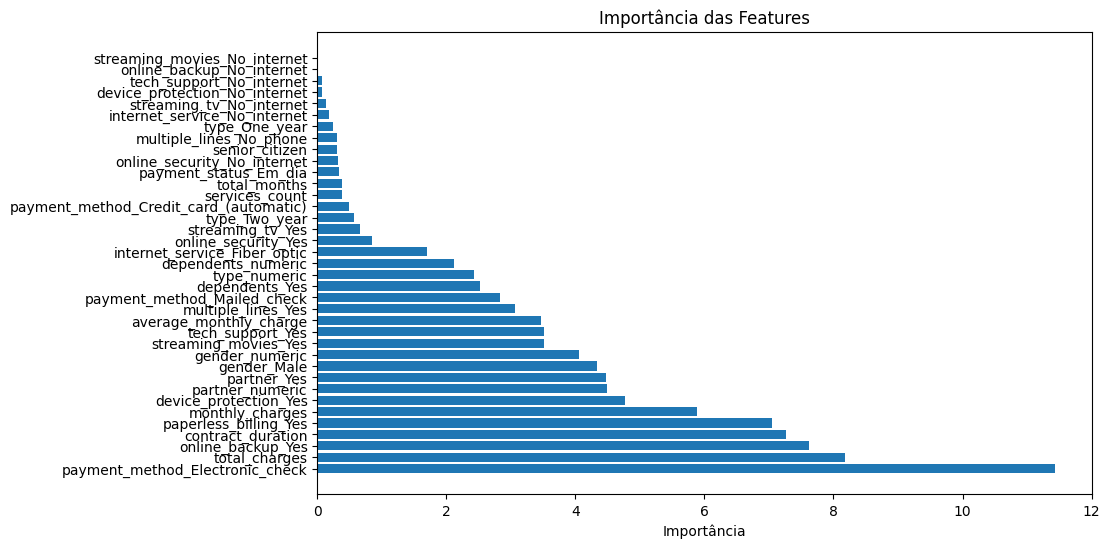

In [10]:
# 1. Análise de Importância das Features
feature_importances = model_best.feature_importances_
feature_names = X_train.columns

importances_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Features')
plt.show()

# Análise de Intervalo de Confiança da Métrica AUC

Para garantir a robustez da métrica AUC (Área Sob a Curva ROC) obtida pelo modelo de CatBoost, foi realizada uma análise de intervalo de confiança utilizando a técnica de bootstrapping. Essa técnica envolve a repetição do processo de amostragem do conjunto de dados várias vezes, permitindo estimar a variação da métrica e calcular o intervalo de confiança.

Após aplicar o bootstrapping, a AUC média foi calculada em 0.8828, reforçando a alta capacidade de discriminação do modelo. Além disso, foi possível calcular o intervalo de confiança de 95% para a AUC, que resultou no intervalo de [0.8630, 0.9026]. Isso significa que, com 95% de confiança, o verdadeiro valor da AUC do modelo de churn está entre 0.8630 e 0.9026.

Esse intervalo demonstra que o modelo é consistentemente robusto na previsão do churn, mesmo considerando possíveis variações nos dados de teste. A proximidade dos limites do intervalo indica que o modelo não apenas obteve uma AUC alta, mas também que essa métrica é estável e confiável em diferentes amostras.

In [11]:
# 2. Análise de Intervalo de Confiança da Métrica


def bootstrap_auc(model, X_test, y_test, n_iterations=1000):
    auc_scores = []
    for _ in range(n_iterations):
        # Criar amostra de bootstrap
        X_resampled, y_resampled = resample(X_test, y_test, replace=True)
        y_pred_proba = model.predict_proba(X_resampled)[:, 1]
        auc = roc_auc_score(y_resampled, y_pred_proba)
        auc_scores.append(auc)
    return np.array(auc_scores)


# Calcular AUC com bootstrapping
auc_scores = bootstrap_auc(model_best, X_test, y_test)

# Calcular intervalo de confiança
ci_lower = np.percentile(auc_scores, 2.5)
ci_upper = np.percentile(auc_scores, 97.5)
print(f"AUC com Bootstrapping: {np.mean(auc_scores):.4f}")
print(f"Intervalo de Confiança da AUC (95%): [{ci_lower:.4f}, {ci_upper:.4f}]")

AUC com Bootstrapping: 0.8828
Intervalo de Confiança da AUC (95%): [0.8630, 0.9026]


# Avaliação de Erros

A avaliação do desempenho do modelo de CatBoost foi feita por meio da matriz de confusão e do relatório de classificação no conjunto de teste. Esses métodos fornecem uma visão detalhada dos erros cometidos pelo modelo, bem como uma análise das principais métricas de avaliação.

A matriz de confusão apresenta os seguintes resultados:

912 clientes foram corretamente identificados como não churn (True Negatives).
121 clientes foram erroneamente classificados como churn, embora tenham permanecido com o serviço (False Positives).
117 clientes que realmente abandonaram o serviço foram incorretamente classificados como não churn (False Negatives).
257 clientes foram corretamente identificados como churn (True Positives).
Essa análise demonstra que o modelo possui uma alta capacidade de identificar corretamente os clientes que não abandonaram o serviço, com uma proporção moderada de falsos positivos e falsos negativos. No entanto, o número de falsos negativos, que representa clientes que deixaram o serviço mas não foram previstos como churn, ainda merece atenção, pois representa uma oportunidade perdida de retenção.

O relatório de classificação complementa a matriz de confusão com as principais métricas:

               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1033
           1       0.68      0.69      0.68       374

    accuracy                           0.83      1407
    macro avg      0.78      0.79      0.78      1407
    weighted avg   0.83      0.83      0.83      1407

    
- Acurácia: 0.83 — O modelo acertou aproximadamente 83% das classificações totais no conjunto de teste.
- Precisão (Classe 1 - churn): 0.68 — Cerca de 68% dos clientes previstos como churn realmente abandonaram o serviço.
- Recall (Classe 1 - churn): 0.69 — O modelo identificou corretamente aproximadamente 69% dos clientes que abandonaram o serviço.
- F1-score (Classe 1 - churn): 0.68 — O F1-score para a classe churn mostra um equilíbrio razoável entre precisão e recall.
- Macro e Weighted Avg: As médias ponderadas e macro indicam um bom desempenho geral, refletindo o equilíbrio do modelo nas diferentes classes.

**Análise Final:**

O modelo obteve uma acurácia de 83%, o que demonstra uma boa capacidade geral de previsão. A precisão e o recall para a classe "churn" ficaram em torno de 0.68-0.69, o que indica que o modelo é eficiente na previsão de clientes churn, mas ainda há espaço para melhorias, especialmente no equilíbrio entre falsos positivos e falsos negativos.

Essas métricas ajudam a identificar os padrões de erro do modelo e podem guiar ajustes futuros, tanto em termos de otimização quanto em estratégias para reduzir os falsos negativos, que são críticos em cenários de churn.

Matriz de Confusão (Teste):
 [[912 121]
 [117 257]]
Relatório de Classificação (Teste):
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1033
           1       0.68      0.69      0.68       374

    accuracy                           0.83      1407
   macro avg       0.78      0.79      0.78      1407
weighted avg       0.83      0.83      0.83      1407



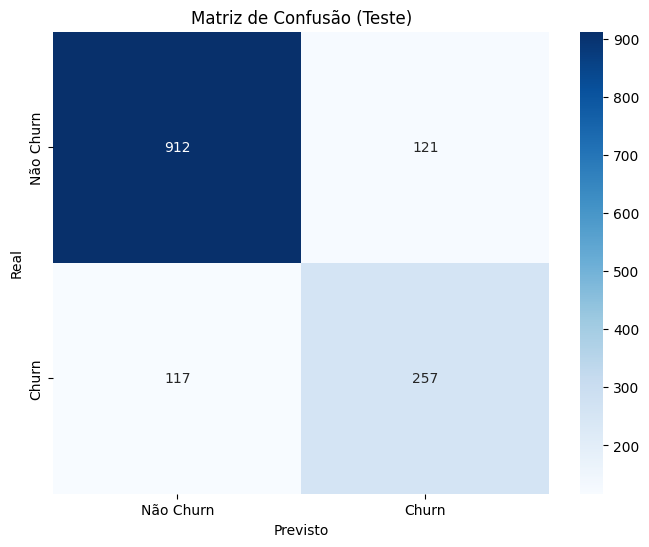

In [12]:
# 3. Avaliação de Erros
y_test_pred = model_best.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusão (Teste):\n", conf_matrix_test)

# Relatório de Classificação
report_test = classification_report(y_test, y_test_pred)
print("Relatório de Classificação (Teste):\n", report_test)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão (Teste)')
plt.show()

### Quais passos do plano foram executados e quais foram pulados? Explique o motivo.

**Passos executados:**
1. **Tratamento de Dados:** Realizamos uma análise e tratamento de dados faltantes e duplicados, além de padronização de cabeçalhos e ajuste dos tipos de dados.
2. **Análise Exploratória de Dados (EDA):** Conduzimos uma EDA completa para entender melhor as variáveis e suas interações.
3. **Juncão dos DataFrames:** Utilizamos o `merge` para unir os quatro dataframes (contract.csv, personal.csv, internet.csv e phone.csv), criando um novo conjunto de dados.
4. **Feature Engineering:** Criamos novas variáveis e analisamos estatísticas e correlações entre as variáveis.
5. **Transformação de Variáveis Categóricas:** Aplicamos OneHotEncoder para transformar colunas categóricas em variáveis numéricas.
6. **Otimização de Modelos:** Focamos na otimização dos modelos Gradient Boosting e Random Forest, descartando aqueles com menor performance.

**Passos pulados:**
- **Uso de Modelos com Menor Performance:** Optamos por não explorar modelos que apresentaram desempenho inferior em comparação aos modelos mais promissores, como Regressão Logística e Decision Tree. Isso foi feito para concentrar nossos esforços em otimizar modelos que já demonstraram um bom desempenho, maximizando a eficiência do nosso tempo e recursos.

### Quais dificuldades você encontrou e como conseguiu resolvê-las?

Durante o processo, algumas dificuldades surgiram, como a manipulação de dados faltantes e a integração de diferentes dataframes. Para superar essas dificuldades, foram utilizadas técnicas de imputação adequadas para lidar com dados faltantes e ferramentas de merge do pandas para integrar os dataframes de maneira eficiente. Além disso, a análise exploratória revelou informações importantes sobre as variáveis, o que facilitou o processo de feature engineering.

No entanto, uma das maiores dificuldades foi encontrar um modelo que equilibrasse bem as métricas e maximizasse a AUC. Após diversas tentativas com diferentes algoritmos, foi possível identificar a configuração ideal que não apenas melhorou as métricas de desempenho, mas também garantiu uma alta capacidade de discriminação nas previsões.



### Quais foram as etapas principais de resolução da tarefa?

As etapas principais foram:

1. Tratamento e Limpeza de Dados:

- Inclusão de métodos para lidar com dados faltantes e duplicados, utilizando técnicas de imputação para garantir que os dados fossem representativos e completos.
- padronização de cabeçalhos para garantir consistência e facilitamos o entendimento das variáveis. Além disso, ajustamos os tipos de dados para otimizar o desempenho das análises subsequentes.

2. Análise Exploratória:

- Realização de uma análise exploratória de dados (EDA) para identificar padrões e correlações significativas entre variáveis.
- Visualizações gráficas para entender melhor a distribuição dos dados e detectar possíveis outliers, o que contribuiu para a formulação de hipóteses e estratégias para a modelagem.

3. Feature Engineering:

- Criação de novas variáveis que poderiam melhorar o poder preditivo do modelo, como a combinação de features existentes e a transformação de dados categóricos em numéricos utilizando técnicas como OneHotEncoding e Label Encoding.
- Esta etapa também incluiu a normalização e a padronização de variáveis numéricas, o que ajudou a otimizar a performance do modelo. Adicionalmente, foi realizada uma análise de importância das features, que permitiu identificar quais variáveis tinham maior impacto nas previsões e, consequentemente, direcionar as estratégias de negócio para as áreas mais relevantes.

4. Modelagem e Avaliação:

-   Implementação de modelos como Gradient Boosting e Random Forest, seguido de sua otimização utilizando técnicas de ajuste de hiperparâmetros.
- Avaliação de performance por meio de métricas como AUC, acurácia, precisão, recall e F1-score. Através de um processo iterativo, selecionamos o modelo que melhor equilibrava essas métricas, garantindo uma alta capacidade de discriminação nas previsões. Para reforçar a confiabilidade dos resultados, aplicamos a técnica de bootstrapping para calcular o intervalo de confiança da AUC, que nos deu uma visão mais robusta sobre a performance do modelo.

5. Análise de Erros:

- A análise dos erros do modelo foi feita por meio da matriz de confusão e do relatório de classificação, permitindo identificar onde o modelo falhou. A avaliação mostrou uma boa capacidade de previsão, mas também destacou a importância de minimizar os falsos negativos, que representam clientes que deixaram o serviço sem serem previstos. Essa análise foi crucial para entender as limitações do modelo e direcionar melhorias nas futuras iterações.


Essas etapas formaram a base para a análise atual e direcionaram o foco para a otimização de modelos que apresentaram os melhores resultados. O aprendizado obtido ao longo dessas fases foi fundamental para o desenvolvimento de uma abordagem eficaz na previsão de churn.


### Qual é seu modelo final e qual pontuação de qualidade ele tem?

O modelo final escolhido para a previsão de churn foi o `CatBoost`, que apresentou os seguintes resultados de qualidade:

- AUC (Teste Otimizado): 0.8825
- Acurácia (Teste Otimizado): 0.8308
- Precisão (Teste Otimizado): 0.6799
- Recall (Teste Otimizado): 0.6872
- F1 Score (Teste Otimizado): 0.6835

Essas métricas demonstram que o modelo é eficaz em identificar clientes que estão propensos a abandonar o serviço, equilibrando bem a capacidade de previsão entre as classes. A alta pontuação de AUC indica que o modelo tem uma boa capacidade de discriminação, permitindo uma previsão confiável das taxas de churn.
